# Detecting Cybersecurity Threats using Deep Learning

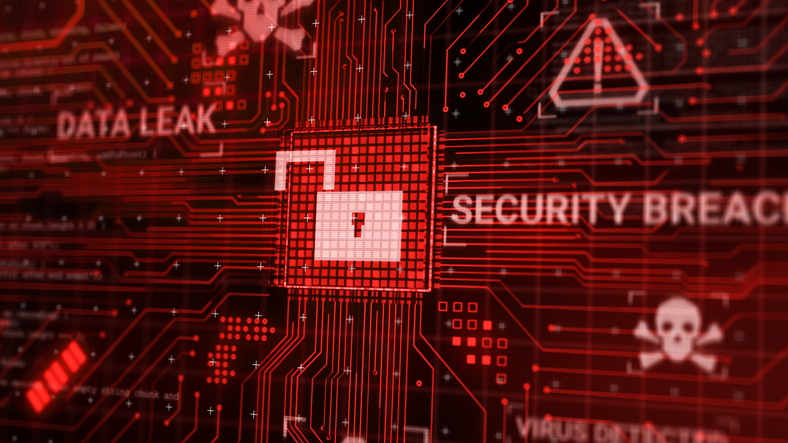

# How to Approach the Project

## 1. Loading and Scaling Data

### Separating Features and Labels
- Drop the `sus_label` column from each DataFrame to separate features.
- Assign the `sus_label` column to the labels.

### Scaling Features
- Initialize a `StandardScaler()` from `sklearn.preprocessing` to scale the features.
- Fit the scaler on the training data and transform the training data.
- Use the fitted scaler to transform the test and validation data.

### Converting to PyTorch Tensors
- Convert the numpy arrays for features and labels to PyTorch tensors using `torch.tensor()`.
- Ensure the features are converted to `float32` type.
- Reshape the labels to have a dimension of `(-1, 1)`.

---

## 2. Define the Neural Network Model

### Creating the Model
- Use `nn.Sequential()` to define the model structure.
- Include three fully connected layers (`nn.Linear()`) with appropriate input and output dimensions.
- Add ReLU activation functions (`nn.ReLU()`) between the layers.
- Use a Sigmoid activation function (`nn.Sigmoid()`) at the output layer for binary classification.

### Initializing Loss Function and Optimizer
- Use `nn.CrossEntropyLoss()`.
- Initialize the optimizer using `optim.SGD` with a learning rate of `1e-3` and `weight_decay` of `1e-4`.

---

## 3. Train and Evaluate the Model

### Setting Up the Training Loop
- Iterate through the specified number of epochs.
- Set the model to training mode using `model.train()`.
- Clear the gradients using `optimizer.zero_grad()`.
- Perform a forward pass to compute the model outputs.
- Compute the loss using the loss function.
- Perform a backward pass to compute the gradients.
- Update the model parameters using `optimizer.step()`.

### Evaluating the Model
- Evaluate the trained model on training, testing, and validation datasets.
- Calculate and print the accuracy for each dataset.
- Use `torchmetrics.Accuracy()` to calculate the accuracy for training, testing, and validation datasets.


In [12]:
import pandas as pd
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.functional as functional
import torch.optim as optim
from torchmetrics import Accuracy
import numpy as np

In [31]:
train_df = pd.read_csv('labelled_train.csv')
val_df = pd.read_csv('labelled_validation.csv')
test_df = pd.read_csv('labelled_test.csv')

## EDA

In [6]:
train_df.head()

,processId,threadId,parentProcessId,userId,mountNamespace,argsNum,returnValue,sus_label
0,381,7337,1,100,4026532231,5,0,1
1,381,7337,1,100,4026532231,1,0,1
2,381,7337,1,100,4026532231,0,0,1
3,7347,7347,7341,0,4026531840,2,-2,1
4,7347,7347,7341,0,4026531840,4,0,1


In [7]:
train_df.dtypes

processId          int64
threadId           int64
parentProcessId    int64
userId             int64
mountNamespace     int64
argsNum            int64
returnValue        int64
sus_label          int64
dtype: object

In [8]:
train_df.shape

(763144, 8)

In [9]:
train_df.isnull().sum()

processId          0
threadId           0
parentProcessId    0
userId             0
mountNamespace     0
argsNum            0
returnValue        0
sus_label          0
dtype: int64

In [10]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
processId,763144.0,6.814763e+03,1948.871187,1.000000e+00,7.313000e+03,7.365000e+03,7.415000e+03,8.619000e+03
threadId,763144.0,6.820265e+03,1937.068333,1.000000e+00,7.313000e+03,7.365000e+03,7.415000e+03,8.619000e+03
parentProcessId,763144.0,1.882217e+03,2215.563094,0.000000e+00,1.870000e+02,1.385000e+03,1.648000e+03,7.672000e+03
userId,763144.0,2.279034e+00,37.416576,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03
mountNamespace,763144.0,4.026532e+09,164.902979,4.026532e+09,4.026532e+09,4.026532e+09,4.026532e+09,4.026532e+09
argsNum,763144.0,2.672082e+00,1.340906,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
returnValue,763144.0,1.752092e+01,318.596662,-1.150000e+02,0.000000e+00,0.000000e+00,4.000000e+00,8.289000e+03
sus_label,763144.0,1.662858e-03,0.040744,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [11]:
train_df.nunique()

processId          545
threadId           588
parentProcessId    205
userId               7
mountNamespace       6
argsNum              6
returnValue        524
sus_label            2
dtype: int64

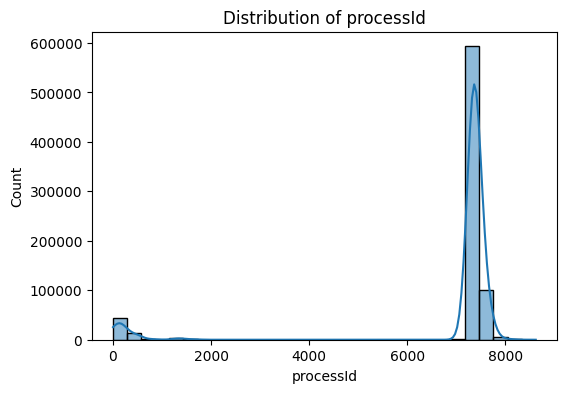

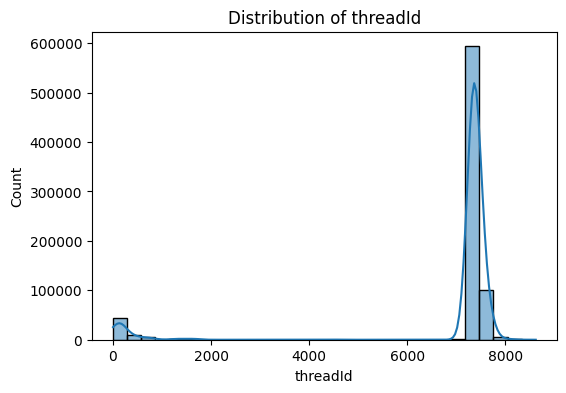

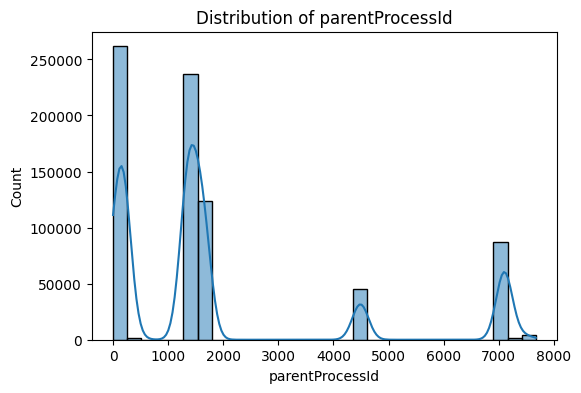

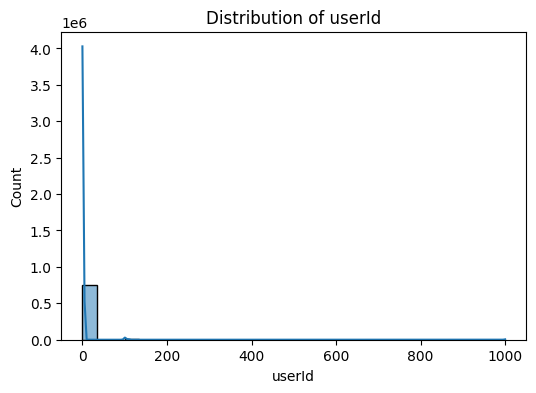

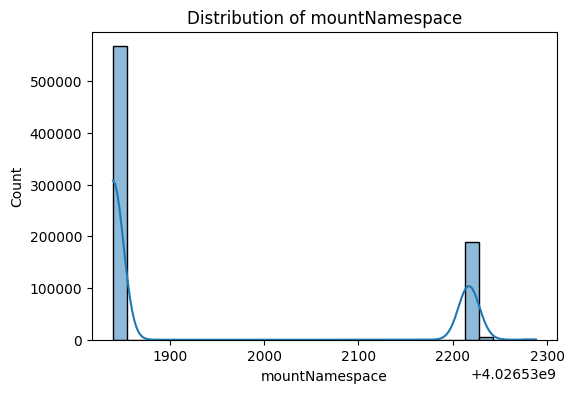

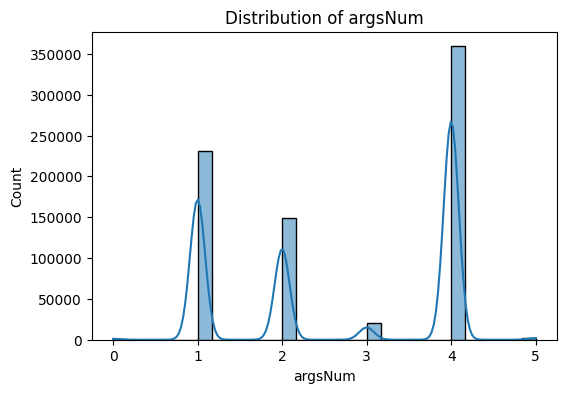

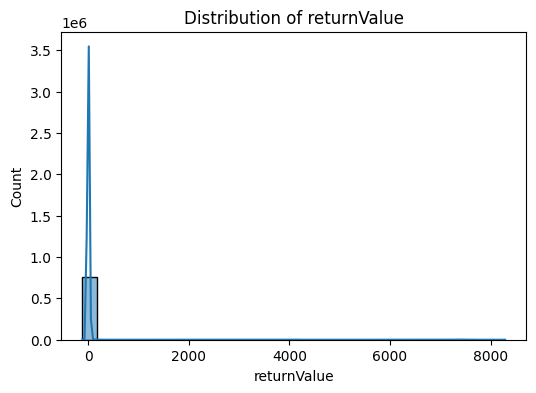

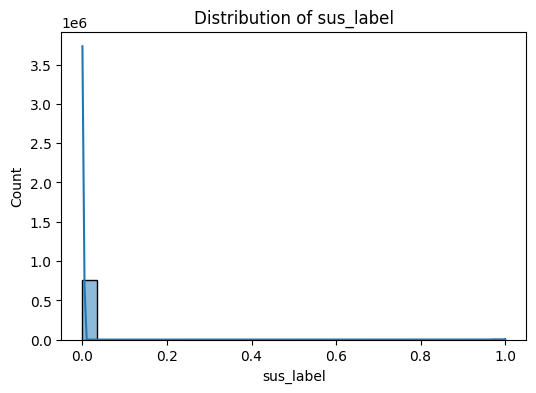

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = train_df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [18]:
categorical_cols = train_df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    train_df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top Categories in {col}")
    plt.show()

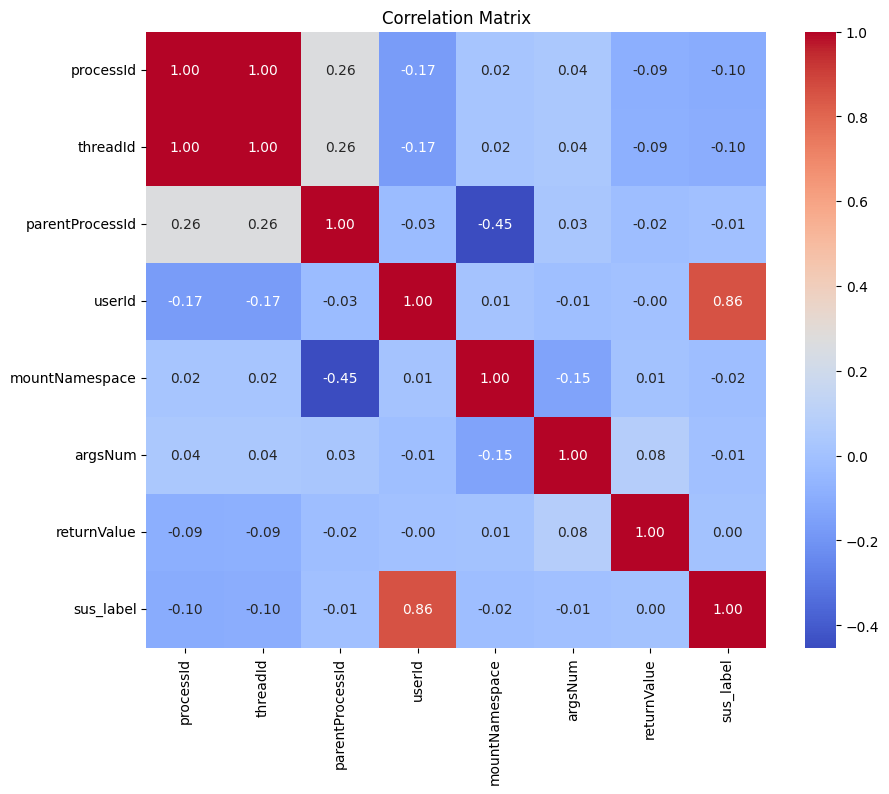

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

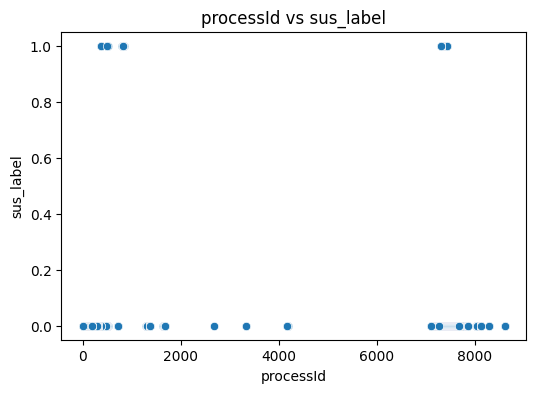

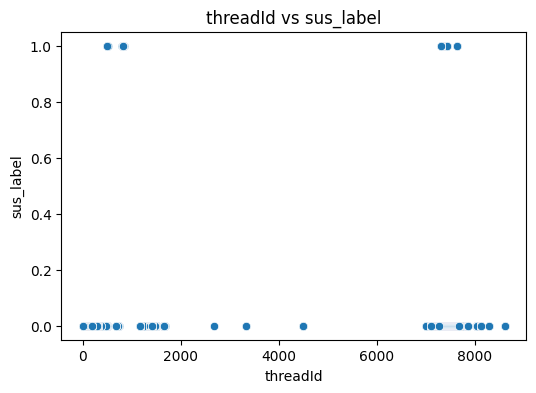

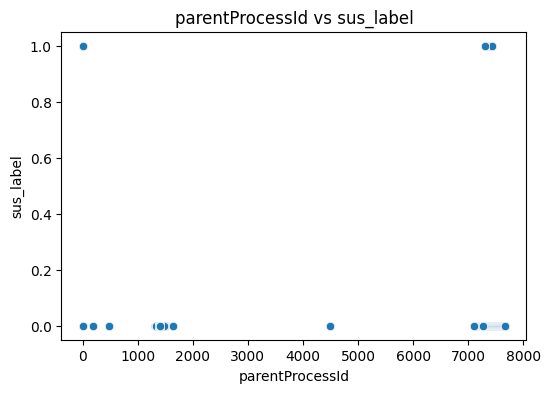

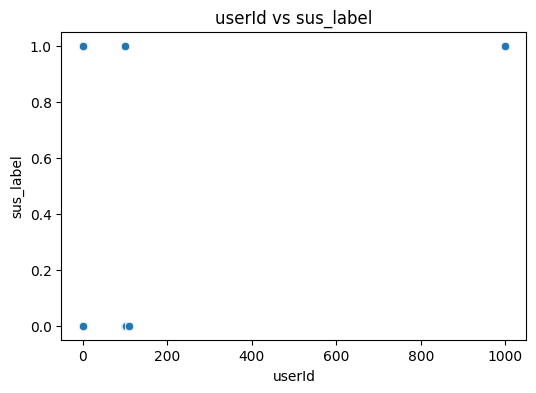

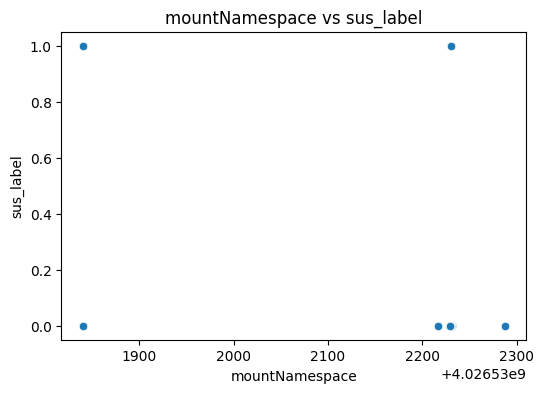

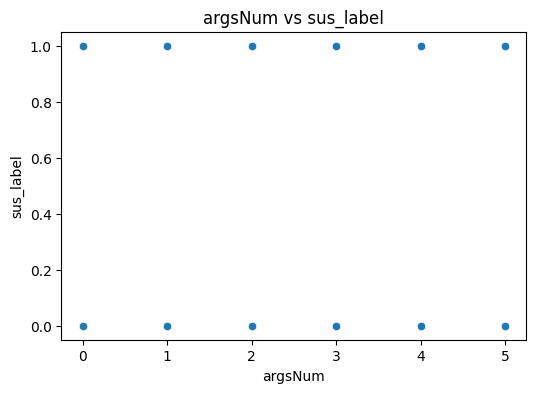

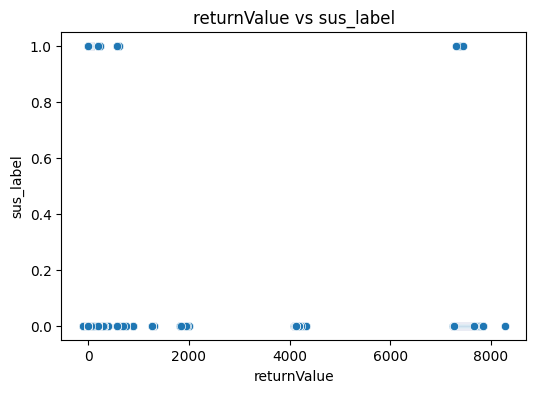

In [ ]:
target = 'sus_label'
if target in train_df.columns:
    for col in numeric_cols:
        if col != target:
            plt.figure(figsize=(6,4))
            sns.scatterplot(data=train_df, x=col, y=target)
            plt.title(f"{col} vs {target}")
            plt.show()

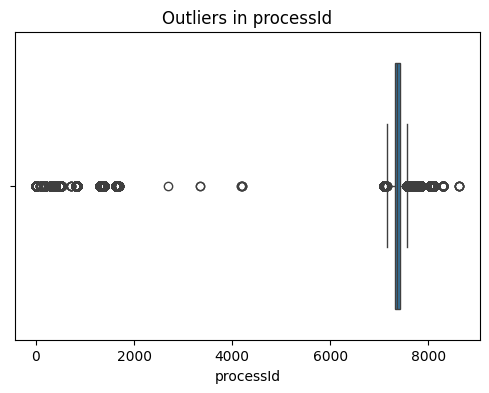

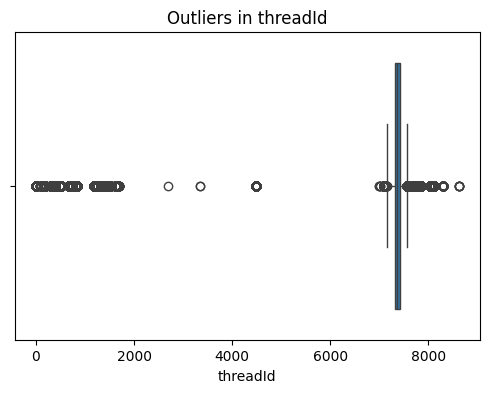

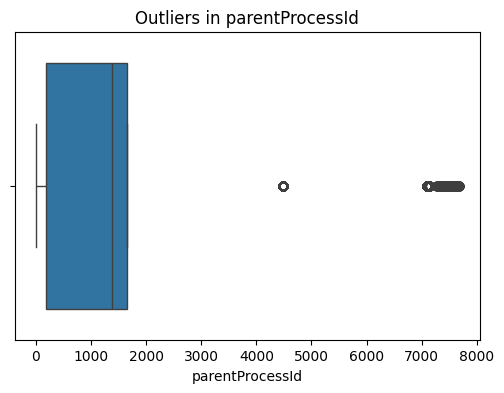

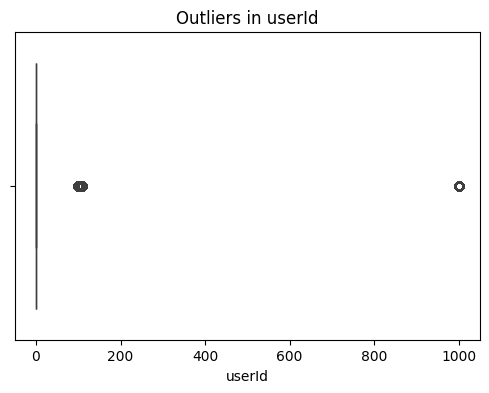

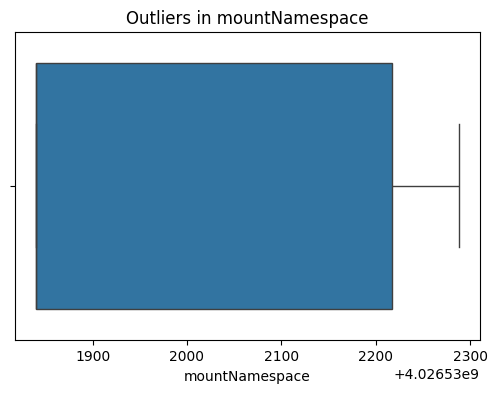

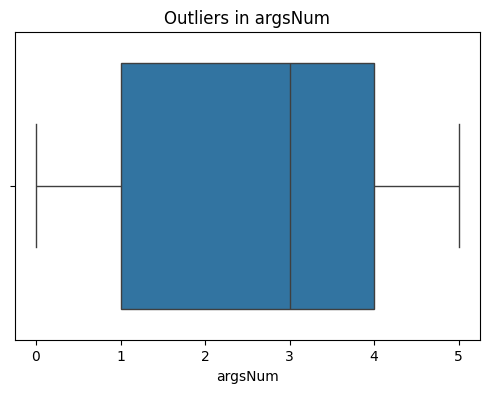

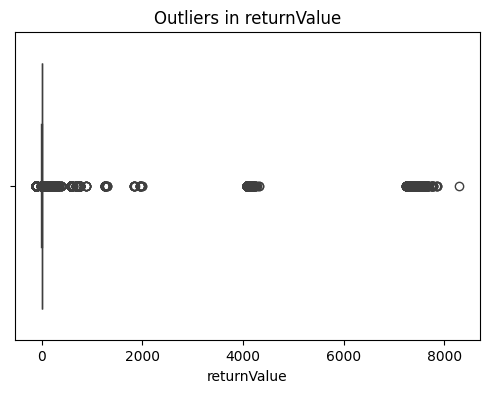

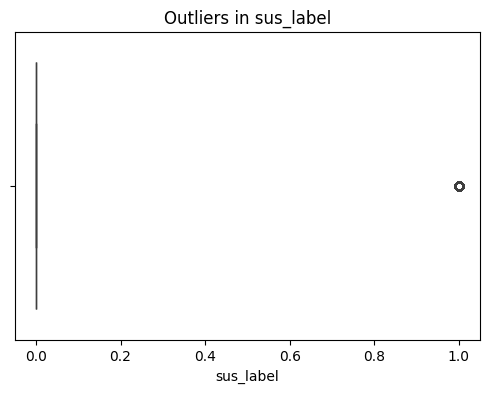

In [21]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train_df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [22]:
!pip install ydata-profiling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 657.0 kB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 2.4 MB/s  0:00:18m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.5/677.5 kB 2.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 3.5 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 2.3 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.0 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16/16 [ydata-profiling] [ydata-profiling]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [23]:
from ydata_profiling import ProfileReport
profile = ProfileReport(train_df, title="EDA Report", explorative=True)
profile.to_file("EDA_Report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 34.77it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preprocessing

In [ ]:
X_train = train_df.drop('sus_label', axis=1).values
y_train = train_df['sus_label'].values
X_test = test_df.drop('sus_label', axis=1).values
y_test = test_df['sus_label'].values
X_val = val_df.drop('sus_label', axis=1).values
y_val = val_df['sus_label'].values

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)



In [34]:
type(X_train)

numpy.ndarray

In [ ]:
import torch
# Convert the numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

In [40]:
X_train[0]

array([-3.301279  ,  0.26676142, -0.84909243,  2.61170424,  1.78399123,
        1.73607956, -0.0549941 ])

## Training and Evaluation

In [41]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid()
)

In [53]:
criterion = nn.BCELoss()
#try BCELoss() - Binary Cross Entropy Loss for binary classification, meaning the model only have 2 classes. This will provide accurate and higher probability.


optimizer = optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-4)
#optimizer = optim.Adam(model.parameters(), lr=0.001)

In [54]:
from tqdm import tqdm

num_epochs = 1000

# Create tqdm progress bar
for epoch in tqdm(range(num_epochs), desc="Training", ncols=100):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Optional: update tqdm description dynamically
    tqdm.write(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {loss.item():.4f}")


Training:   0%|                                                    | 1/1000 [00:00<07:22,  2.26it/s]

Epoch [1/1000] - Loss: 0.7226


Training:   0%|                                                    | 2/1000 [00:00<07:09,  2.33it/s]

Epoch [2/1000] - Loss: 0.7219


Training:   0%|▏                                                   | 3/1000 [00:01<07:23,  2.25it/s]

Epoch [3/1000] - Loss: 0.7211


Training:   0%|▏                                                   | 4/1000 [00:01<07:21,  2.25it/s]

Epoch [4/1000] - Loss: 0.7203


Training:   0%|▎                                                   | 5/1000 [00:02<06:57,  2.38it/s]

Epoch [5/1000] - Loss: 0.7195


Training:   1%|▎                                                   | 6/1000 [00:02<06:48,  2.43it/s]

Epoch [6/1000] - Loss: 0.7187


Training:   1%|▎                                                   | 7/1000 [00:02<06:58,  2.37it/s]

Epoch [7/1000] - Loss: 0.7180


Training:   1%|▍                                                   | 8/1000 [00:03<06:56,  2.38it/s]

Epoch [8/1000] - Loss: 0.7172


Training:   1%|▍                                                   | 9/1000 [00:03<06:57,  2.37it/s]

Epoch [9/1000] - Loss: 0.7164


Training:   1%|▌                                                  | 10/1000 [00:04<07:01,  2.35it/s]

Epoch [10/1000] - Loss: 0.7157


Training:   1%|▌                                                  | 11/1000 [00:04<06:49,  2.41it/s]

Epoch [11/1000] - Loss: 0.7149


Training:   1%|▌                                                  | 12/1000 [00:05<06:43,  2.45it/s]

Epoch [12/1000] - Loss: 0.7141


Training:   1%|▋                                                  | 13/1000 [00:05<06:41,  2.46it/s]

Epoch [13/1000] - Loss: 0.7134


Training:   1%|▋                                                  | 14/1000 [00:05<07:01,  2.34it/s]

Epoch [14/1000] - Loss: 0.7126


Training:   2%|▊                                                  | 15/1000 [00:06<07:16,  2.25it/s]

Epoch [15/1000] - Loss: 0.7118


Training:   2%|▊                                                  | 16/1000 [00:06<07:01,  2.34it/s]

Epoch [16/1000] - Loss: 0.7111


Training:   2%|▊                                                  | 17/1000 [00:07<06:59,  2.34it/s]

Epoch [17/1000] - Loss: 0.7103


Training:   2%|▉                                                  | 18/1000 [00:07<07:15,  2.26it/s]

Epoch [18/1000] - Loss: 0.7096


Training:   2%|▉                                                  | 19/1000 [00:08<07:19,  2.23it/s]

Epoch [19/1000] - Loss: 0.7088


Training:   2%|█                                                  | 20/1000 [00:08<07:09,  2.28it/s]

Epoch [20/1000] - Loss: 0.7080


Training:   2%|█                                                  | 21/1000 [00:09<07:24,  2.20it/s]

Epoch [21/1000] - Loss: 0.7073


Training:   2%|█                                                  | 22/1000 [00:09<07:28,  2.18it/s]

Epoch [22/1000] - Loss: 0.7065


Training:   2%|█▏                                                 | 23/1000 [00:10<07:34,  2.15it/s]

Epoch [23/1000] - Loss: 0.7058


Training:   2%|█▏                                                 | 24/1000 [00:10<07:19,  2.22it/s]

Epoch [24/1000] - Loss: 0.7050


Training:   2%|█▎                                                 | 25/1000 [00:10<07:00,  2.32it/s]

Epoch [25/1000] - Loss: 0.7043


Training:   3%|█▎                                                 | 26/1000 [00:11<06:55,  2.34it/s]

Epoch [26/1000] - Loss: 0.7035


Training:   3%|█▍                                                 | 27/1000 [00:11<07:13,  2.24it/s]

Epoch [27/1000] - Loss: 0.7028


Training:   3%|█▍                                                 | 28/1000 [00:12<07:27,  2.17it/s]

Epoch [28/1000] - Loss: 0.7021


Training:   3%|█▍                                                 | 29/1000 [00:12<07:31,  2.15it/s]

Epoch [29/1000] - Loss: 0.7013


Training:   3%|█▌                                                 | 30/1000 [00:13<07:10,  2.25it/s]

Epoch [30/1000] - Loss: 0.7006


Training:   3%|█▌                                                 | 31/1000 [00:13<07:27,  2.17it/s]

Epoch [31/1000] - Loss: 0.6998


Training:   3%|█▋                                                 | 32/1000 [00:14<07:18,  2.21it/s]

Epoch [32/1000] - Loss: 0.6991


Training:   3%|█▋                                                 | 33/1000 [00:14<07:06,  2.27it/s]

Epoch [33/1000] - Loss: 0.6984


Training:   3%|█▋                                                 | 34/1000 [00:14<07:11,  2.24it/s]

Epoch [34/1000] - Loss: 0.6976


Training:   4%|█▊                                                 | 35/1000 [00:15<07:24,  2.17it/s]

Epoch [35/1000] - Loss: 0.6969


Training:   4%|█▊                                                 | 36/1000 [00:15<07:04,  2.27it/s]

Epoch [36/1000] - Loss: 0.6961


Training:   4%|█▉                                                 | 37/1000 [00:16<06:46,  2.37it/s]

Epoch [37/1000] - Loss: 0.6954


Training:   4%|█▉                                                 | 38/1000 [00:16<06:32,  2.45it/s]

Epoch [38/1000] - Loss: 0.6947


Training:   4%|█▉                                                 | 39/1000 [00:16<06:24,  2.50it/s]

Epoch [39/1000] - Loss: 0.6940


Training:   4%|██                                                 | 40/1000 [00:17<06:22,  2.51it/s]

Epoch [40/1000] - Loss: 0.6932


Training:   4%|██                                                 | 41/1000 [00:17<06:18,  2.53it/s]

Epoch [41/1000] - Loss: 0.6925


Training:   4%|██▏                                                | 42/1000 [00:18<06:15,  2.55it/s]

Epoch [42/1000] - Loss: 0.6918


Training:   4%|██▏                                                | 43/1000 [00:18<06:40,  2.39it/s]

Epoch [43/1000] - Loss: 0.6911


Training:   4%|██▏                                                | 44/1000 [00:19<06:56,  2.30it/s]

Epoch [44/1000] - Loss: 0.6903


Training:   4%|██▎                                                | 45/1000 [00:19<06:45,  2.36it/s]

Epoch [45/1000] - Loss: 0.6896


Training:   5%|██▎                                                | 46/1000 [00:19<06:48,  2.34it/s]

Epoch [46/1000] - Loss: 0.6889


Training:   5%|██▍                                                | 47/1000 [00:20<07:01,  2.26it/s]

Epoch [47/1000] - Loss: 0.6882


Training:   5%|██▍                                                | 48/1000 [00:20<06:55,  2.29it/s]

Epoch [48/1000] - Loss: 0.6875


Training:   5%|██▍                                                | 49/1000 [00:21<06:39,  2.38it/s]

Epoch [49/1000] - Loss: 0.6867


Training:   5%|██▌                                                | 50/1000 [00:21<06:28,  2.45it/s]

Epoch [50/1000] - Loss: 0.6860


Training:   5%|██▌                                                | 51/1000 [00:21<06:19,  2.50it/s]

Epoch [51/1000] - Loss: 0.6853


Training:   5%|██▋                                                | 52/1000 [00:22<06:17,  2.51it/s]

Epoch [52/1000] - Loss: 0.6846


Training:   5%|██▋                                                | 53/1000 [00:22<06:30,  2.43it/s]

Epoch [53/1000] - Loss: 0.6839


Training:   5%|██▊                                                | 54/1000 [00:23<06:21,  2.48it/s]

Epoch [54/1000] - Loss: 0.6832


Training:   6%|██▊                                                | 55/1000 [00:23<06:21,  2.48it/s]

Epoch [55/1000] - Loss: 0.6825


Training:   6%|██▊                                                | 56/1000 [00:23<06:12,  2.54it/s]

Epoch [56/1000] - Loss: 0.6818


Training:   6%|██▉                                                | 57/1000 [00:24<06:13,  2.53it/s]

Epoch [57/1000] - Loss: 0.6810


Training:   6%|██▉                                                | 58/1000 [00:24<06:07,  2.56it/s]

Epoch [58/1000] - Loss: 0.6803


Training:   6%|███                                                | 59/1000 [00:25<06:00,  2.61it/s]

Epoch [59/1000] - Loss: 0.6796


Training:   6%|███                                                | 60/1000 [00:25<05:57,  2.63it/s]

Epoch [60/1000] - Loss: 0.6789


Training:   6%|███                                                | 61/1000 [00:25<05:54,  2.65it/s]

Epoch [61/1000] - Loss: 0.6782


Training:   6%|███▏                                               | 62/1000 [00:26<06:12,  2.52it/s]

Epoch [62/1000] - Loss: 0.6775


Training:   6%|███▏                                               | 63/1000 [00:26<06:07,  2.55it/s]

Epoch [63/1000] - Loss: 0.6768


Training:   6%|███▎                                               | 64/1000 [00:27<06:10,  2.53it/s]

Epoch [64/1000] - Loss: 0.6761


Training:   6%|███▎                                               | 65/1000 [00:27<06:10,  2.53it/s]

Epoch [65/1000] - Loss: 0.6754


Training:   7%|███▎                                               | 66/1000 [00:27<06:33,  2.37it/s]

Epoch [66/1000] - Loss: 0.6747


Training:   7%|███▍                                               | 67/1000 [00:28<06:44,  2.30it/s]

Epoch [67/1000] - Loss: 0.6740


Training:   7%|███▍                                               | 68/1000 [00:28<06:29,  2.39it/s]

Epoch [68/1000] - Loss: 0.6733


Training:   7%|███▌                                               | 69/1000 [00:29<06:19,  2.45it/s]

Epoch [69/1000] - Loss: 0.6727


Training:   7%|███▌                                               | 70/1000 [00:29<06:23,  2.43it/s]

Epoch [70/1000] - Loss: 0.6720


Training:   7%|███▌                                               | 71/1000 [00:29<06:15,  2.48it/s]

Epoch [71/1000] - Loss: 0.6713


Training:   7%|███▋                                               | 72/1000 [00:30<06:08,  2.52it/s]

Epoch [72/1000] - Loss: 0.6706


Training:   7%|███▋                                               | 73/1000 [00:30<06:03,  2.55it/s]

Epoch [73/1000] - Loss: 0.6699


Training:   7%|███▊                                               | 74/1000 [00:31<06:21,  2.43it/s]

Epoch [74/1000] - Loss: 0.6692


Training:   8%|███▊                                               | 75/1000 [00:31<06:36,  2.33it/s]

Epoch [75/1000] - Loss: 0.6685


Training:   8%|███▉                                               | 76/1000 [00:32<06:23,  2.41it/s]

Epoch [76/1000] - Loss: 0.6678


Training:   8%|███▉                                               | 77/1000 [00:32<06:11,  2.49it/s]

Epoch [77/1000] - Loss: 0.6671


Training:   8%|███▉                                               | 78/1000 [00:32<06:12,  2.48it/s]

Epoch [78/1000] - Loss: 0.6665


Training:   8%|████                                               | 79/1000 [00:33<06:08,  2.50it/s]

Epoch [79/1000] - Loss: 0.6658


Training:   8%|████                                               | 80/1000 [00:33<06:06,  2.51it/s]

Epoch [80/1000] - Loss: 0.6651


Training:   8%|████▏                                              | 81/1000 [00:33<06:02,  2.54it/s]

Epoch [81/1000] - Loss: 0.6644


Training:   8%|████▏                                              | 82/1000 [00:34<06:00,  2.54it/s]

Epoch [82/1000] - Loss: 0.6637


Training:   8%|████▏                                              | 83/1000 [00:34<06:24,  2.39it/s]

Epoch [83/1000] - Loss: 0.6631


Training:   8%|████▎                                              | 84/1000 [00:35<06:16,  2.43it/s]

Epoch [84/1000] - Loss: 0.6624


Training:   8%|████▎                                              | 85/1000 [00:35<06:08,  2.48it/s]

Epoch [85/1000] - Loss: 0.6617


Training:   9%|████▍                                              | 86/1000 [00:35<06:02,  2.52it/s]

Epoch [86/1000] - Loss: 0.6610


Training:   9%|████▍                                              | 87/1000 [00:36<06:23,  2.38it/s]

Epoch [87/1000] - Loss: 0.6604


Training:   9%|████▍                                              | 88/1000 [00:36<06:21,  2.39it/s]

Epoch [88/1000] - Loss: 0.6597


Training:   9%|████▌                                              | 89/1000 [00:37<06:16,  2.42it/s]

Epoch [89/1000] - Loss: 0.6590


Training:   9%|████▌                                              | 90/1000 [00:37<06:12,  2.44it/s]

Epoch [90/1000] - Loss: 0.6583


Training:   9%|████▋                                              | 91/1000 [00:38<06:08,  2.47it/s]

Epoch [91/1000] - Loss: 0.6577


Training:   9%|████▋                                              | 92/1000 [00:38<06:03,  2.50it/s]

Epoch [92/1000] - Loss: 0.6570


Training:   9%|████▋                                              | 93/1000 [00:38<05:58,  2.53it/s]

Epoch [93/1000] - Loss: 0.6563


Training:   9%|████▊                                              | 94/1000 [00:39<05:54,  2.56it/s]

Epoch [94/1000] - Loss: 0.6557


Training:  10%|████▊                                              | 95/1000 [00:39<05:54,  2.55it/s]

Epoch [95/1000] - Loss: 0.6550


Training:  10%|████▉                                              | 96/1000 [00:40<05:52,  2.57it/s]

Epoch [96/1000] - Loss: 0.6543


Training:  10%|████▉                                              | 97/1000 [00:40<05:48,  2.59it/s]

Epoch [97/1000] - Loss: 0.6537


Training:  10%|████▉                                              | 98/1000 [00:40<05:44,  2.62it/s]

Epoch [98/1000] - Loss: 0.6530


Training:  10%|█████                                              | 99/1000 [00:41<05:43,  2.62it/s]

Epoch [99/1000] - Loss: 0.6523


Training:  10%|█████                                             | 100/1000 [00:41<06:00,  2.50it/s]

Epoch [100/1000] - Loss: 0.6517


Training:  10%|█████                                             | 101/1000 [00:41<05:52,  2.55it/s]

Epoch [101/1000] - Loss: 0.6510


Training:  10%|█████                                             | 102/1000 [00:42<05:51,  2.55it/s]

Epoch [102/1000] - Loss: 0.6504


Training:  10%|█████▏                                            | 103/1000 [00:42<05:49,  2.56it/s]

Epoch [103/1000] - Loss: 0.6497


Training:  10%|█████▏                                            | 104/1000 [00:43<05:51,  2.55it/s]

Epoch [104/1000] - Loss: 0.6491


Training:  10%|█████▎                                            | 105/1000 [00:43<05:52,  2.54it/s]

Epoch [105/1000] - Loss: 0.6484


Training:  11%|█████▎                                            | 106/1000 [00:43<05:52,  2.54it/s]

Epoch [106/1000] - Loss: 0.6477


Training:  11%|█████▎                                            | 107/1000 [00:44<06:03,  2.46it/s]

Epoch [107/1000] - Loss: 0.6471


Training:  11%|█████▍                                            | 108/1000 [00:44<06:09,  2.41it/s]

Epoch [108/1000] - Loss: 0.6464


Training:  11%|█████▍                                            | 109/1000 [00:45<06:22,  2.33it/s]

Epoch [109/1000] - Loss: 0.6458


Training:  11%|█████▌                                            | 110/1000 [00:45<06:13,  2.38it/s]

Epoch [110/1000] - Loss: 0.6451


Training:  11%|█████▌                                            | 111/1000 [00:46<06:09,  2.41it/s]

Epoch [111/1000] - Loss: 0.6445


Training:  11%|█████▌                                            | 112/1000 [00:46<05:58,  2.48it/s]

Epoch [112/1000] - Loss: 0.6438


Training:  11%|█████▋                                            | 113/1000 [00:46<05:58,  2.47it/s]

Epoch [113/1000] - Loss: 0.6432


Training:  11%|█████▋                                            | 114/1000 [00:47<05:55,  2.49it/s]

Epoch [114/1000] - Loss: 0.6425


Training:  12%|█████▊                                            | 115/1000 [00:47<05:50,  2.52it/s]

Epoch [115/1000] - Loss: 0.6419


Training:  12%|█████▊                                            | 116/1000 [00:48<05:54,  2.49it/s]

Epoch [116/1000] - Loss: 0.6412


Training:  12%|█████▊                                            | 117/1000 [00:48<05:53,  2.50it/s]

Epoch [117/1000] - Loss: 0.6406


Training:  12%|█████▉                                            | 118/1000 [00:48<05:56,  2.47it/s]

Epoch [118/1000] - Loss: 0.6399


Training:  12%|█████▉                                            | 119/1000 [00:49<05:52,  2.50it/s]

Epoch [119/1000] - Loss: 0.6393


Training:  12%|██████                                            | 120/1000 [00:49<05:49,  2.52it/s]

Epoch [120/1000] - Loss: 0.6387


Training:  12%|██████                                            | 121/1000 [00:50<05:46,  2.53it/s]

Epoch [121/1000] - Loss: 0.6380


Training:  12%|██████                                            | 122/1000 [00:50<05:53,  2.48it/s]

Epoch [122/1000] - Loss: 0.6374


Training:  12%|██████▏                                           | 123/1000 [00:50<05:50,  2.50it/s]

Epoch [123/1000] - Loss: 0.6367


Training:  12%|██████▏                                           | 124/1000 [00:51<05:46,  2.53it/s]

Epoch [124/1000] - Loss: 0.6361


Training:  12%|██████▎                                           | 125/1000 [00:51<05:44,  2.54it/s]

Epoch [125/1000] - Loss: 0.6355


Training:  13%|██████▎                                           | 126/1000 [00:52<05:46,  2.52it/s]

Epoch [126/1000] - Loss: 0.6348


Training:  13%|██████▎                                           | 127/1000 [00:52<05:49,  2.50it/s]

Epoch [127/1000] - Loss: 0.6342


Training:  13%|██████▍                                           | 128/1000 [00:52<05:46,  2.52it/s]

Epoch [128/1000] - Loss: 0.6336


Training:  13%|██████▍                                           | 129/1000 [00:53<05:44,  2.53it/s]

Epoch [129/1000] - Loss: 0.6329


Training:  13%|██████▌                                           | 130/1000 [00:53<05:43,  2.53it/s]

Epoch [130/1000] - Loss: 0.6323


Training:  13%|██████▌                                           | 131/1000 [00:54<05:48,  2.49it/s]

Epoch [131/1000] - Loss: 0.6317


Training:  13%|██████▌                                           | 132/1000 [00:54<05:56,  2.44it/s]

Epoch [132/1000] - Loss: 0.6311


Training:  13%|██████▋                                           | 133/1000 [00:54<05:49,  2.48it/s]

Epoch [133/1000] - Loss: 0.6304


Training:  13%|██████▋                                           | 134/1000 [00:55<05:49,  2.48it/s]

Epoch [134/1000] - Loss: 0.6298


Training:  14%|██████▊                                           | 135/1000 [00:55<06:01,  2.39it/s]

Epoch [135/1000] - Loss: 0.6292


Training:  14%|██████▊                                           | 136/1000 [00:56<05:57,  2.42it/s]

Epoch [136/1000] - Loss: 0.6285


Training:  14%|██████▊                                           | 137/1000 [00:56<05:59,  2.40it/s]

Epoch [137/1000] - Loss: 0.6279


Training:  14%|██████▉                                           | 138/1000 [00:57<06:19,  2.27it/s]

Epoch [138/1000] - Loss: 0.6273


Training:  14%|██████▉                                           | 139/1000 [00:57<06:17,  2.28it/s]

Epoch [139/1000] - Loss: 0.6267


Training:  14%|███████                                           | 140/1000 [00:57<06:04,  2.36it/s]

Epoch [140/1000] - Loss: 0.6261


Training:  14%|███████                                           | 141/1000 [00:58<05:53,  2.43it/s]

Epoch [141/1000] - Loss: 0.6254


Training:  14%|███████                                           | 142/1000 [00:58<05:48,  2.46it/s]

Epoch [142/1000] - Loss: 0.6248


Training:  14%|███████▏                                          | 143/1000 [00:59<05:46,  2.47it/s]

Epoch [143/1000] - Loss: 0.6242


Training:  14%|███████▏                                          | 144/1000 [00:59<05:40,  2.51it/s]

Epoch [144/1000] - Loss: 0.6236


Training:  14%|███████▏                                          | 145/1000 [00:59<05:44,  2.48it/s]

Epoch [145/1000] - Loss: 0.6230


Training:  15%|███████▎                                          | 146/1000 [01:00<05:40,  2.51it/s]

Epoch [146/1000] - Loss: 0.6223


Training:  15%|███████▎                                          | 147/1000 [01:00<05:39,  2.51it/s]

Epoch [147/1000] - Loss: 0.6217


Training:  15%|███████▍                                          | 148/1000 [01:00<05:37,  2.52it/s]

Epoch [148/1000] - Loss: 0.6211


Training:  15%|███████▍                                          | 149/1000 [01:01<05:35,  2.54it/s]

Epoch [149/1000] - Loss: 0.6205


Training:  15%|███████▌                                          | 150/1000 [01:01<05:55,  2.39it/s]

Epoch [150/1000] - Loss: 0.6199


Training:  15%|███████▌                                          | 151/1000 [01:02<06:03,  2.34it/s]

Epoch [151/1000] - Loss: 0.6193


Training:  15%|███████▌                                          | 152/1000 [01:02<06:02,  2.34it/s]

Epoch [152/1000] - Loss: 0.6187


Training:  15%|███████▋                                          | 153/1000 [01:03<05:50,  2.42it/s]

Epoch [153/1000] - Loss: 0.6180


Training:  15%|███████▋                                          | 154/1000 [01:03<05:53,  2.40it/s]

Epoch [154/1000] - Loss: 0.6174


Training:  16%|███████▊                                          | 155/1000 [01:03<05:41,  2.47it/s]

Epoch [155/1000] - Loss: 0.6168


Training:  16%|███████▊                                          | 156/1000 [01:04<05:34,  2.52it/s]

Epoch [156/1000] - Loss: 0.6162


Training:  16%|███████▊                                          | 157/1000 [01:04<05:31,  2.55it/s]

Epoch [157/1000] - Loss: 0.6156


Training:  16%|███████▉                                          | 158/1000 [01:05<05:32,  2.53it/s]

Epoch [158/1000] - Loss: 0.6150


Training:  16%|███████▉                                          | 159/1000 [01:05<05:33,  2.53it/s]

Epoch [159/1000] - Loss: 0.6144


Training:  16%|████████                                          | 160/1000 [01:05<05:27,  2.56it/s]

Epoch [160/1000] - Loss: 0.6138


Training:  16%|████████                                          | 161/1000 [01:06<05:26,  2.57it/s]

Epoch [161/1000] - Loss: 0.6132


Training:  16%|████████                                          | 162/1000 [01:06<05:20,  2.61it/s]

Epoch [162/1000] - Loss: 0.6126


Training:  16%|████████▏                                         | 163/1000 [01:06<05:17,  2.63it/s]

Epoch [163/1000] - Loss: 0.6120


Training:  16%|████████▏                                         | 164/1000 [01:07<05:15,  2.65it/s]

Epoch [164/1000] - Loss: 0.6114


Training:  16%|████████▎                                         | 165/1000 [01:07<05:15,  2.65it/s]

Epoch [165/1000] - Loss: 0.6108


Training:  17%|████████▎                                         | 166/1000 [01:08<05:17,  2.63it/s]

Epoch [166/1000] - Loss: 0.6102


Training:  17%|████████▎                                         | 167/1000 [01:08<05:13,  2.65it/s]

Epoch [167/1000] - Loss: 0.6096


Training:  17%|████████▍                                         | 168/1000 [01:08<05:30,  2.52it/s]

Epoch [168/1000] - Loss: 0.6090


Training:  17%|████████▍                                         | 169/1000 [01:09<05:40,  2.44it/s]

Epoch [169/1000] - Loss: 0.6084


Training:  17%|████████▌                                         | 170/1000 [01:09<05:34,  2.48it/s]

Epoch [170/1000] - Loss: 0.6078


Training:  17%|████████▌                                         | 171/1000 [01:10<05:44,  2.41it/s]

Epoch [171/1000] - Loss: 0.6072


Training:  17%|████████▌                                         | 172/1000 [01:10<05:39,  2.44it/s]

Epoch [172/1000] - Loss: 0.6066


Training:  17%|████████▋                                         | 173/1000 [01:10<05:33,  2.48it/s]

Epoch [173/1000] - Loss: 0.6060


Training:  17%|████████▋                                         | 174/1000 [01:11<05:32,  2.49it/s]

Epoch [174/1000] - Loss: 0.6054


Training:  18%|████████▊                                         | 175/1000 [01:11<05:29,  2.51it/s]

Epoch [175/1000] - Loss: 0.6048


Training:  18%|████████▊                                         | 176/1000 [01:12<05:47,  2.37it/s]

Epoch [176/1000] - Loss: 0.6042


Training:  18%|████████▊                                         | 177/1000 [01:12<05:39,  2.42it/s]

Epoch [177/1000] - Loss: 0.6036


Training:  18%|████████▉                                         | 178/1000 [01:13<05:36,  2.44it/s]

Epoch [178/1000] - Loss: 0.6031


Training:  18%|████████▉                                         | 179/1000 [01:13<05:44,  2.38it/s]

Epoch [179/1000] - Loss: 0.6025


Training:  18%|█████████                                         | 180/1000 [01:13<05:39,  2.42it/s]

Epoch [180/1000] - Loss: 0.6019


Training:  18%|█████████                                         | 181/1000 [01:14<05:34,  2.45it/s]

Epoch [181/1000] - Loss: 0.6013


Training:  18%|█████████                                         | 182/1000 [01:14<05:31,  2.47it/s]

Epoch [182/1000] - Loss: 0.6007


Training:  18%|█████████▏                                        | 183/1000 [01:15<05:33,  2.45it/s]

Epoch [183/1000] - Loss: 0.6001


Training:  18%|█████████▏                                        | 184/1000 [01:15<05:34,  2.44it/s]

Epoch [184/1000] - Loss: 0.5995


Training:  18%|█████████▎                                        | 185/1000 [01:15<05:36,  2.42it/s]

Epoch [185/1000] - Loss: 0.5989


Training:  19%|█████████▎                                        | 186/1000 [01:16<05:27,  2.48it/s]

Epoch [186/1000] - Loss: 0.5984


Training:  19%|█████████▎                                        | 187/1000 [01:16<05:33,  2.43it/s]

Epoch [187/1000] - Loss: 0.5978


Training:  19%|█████████▍                                        | 188/1000 [01:17<05:40,  2.39it/s]

Epoch [188/1000] - Loss: 0.5972


Training:  19%|█████████▍                                        | 189/1000 [01:17<05:34,  2.43it/s]

Epoch [189/1000] - Loss: 0.5966


Training:  19%|█████████▌                                        | 190/1000 [01:17<05:35,  2.41it/s]

Epoch [190/1000] - Loss: 0.5960


Training:  19%|█████████▌                                        | 191/1000 [01:18<05:33,  2.43it/s]

Epoch [191/1000] - Loss: 0.5955


Training:  19%|█████████▌                                        | 192/1000 [01:18<05:24,  2.49it/s]

Epoch [192/1000] - Loss: 0.5949


Training:  19%|█████████▋                                        | 193/1000 [01:19<05:18,  2.54it/s]

Epoch [193/1000] - Loss: 0.5943


Training:  19%|█████████▋                                        | 194/1000 [01:19<05:37,  2.39it/s]

Epoch [194/1000] - Loss: 0.5937


Training:  20%|█████████▊                                        | 195/1000 [01:20<05:32,  2.42it/s]

Epoch [195/1000] - Loss: 0.5931


Training:  20%|█████████▊                                        | 196/1000 [01:20<05:26,  2.46it/s]

Epoch [196/1000] - Loss: 0.5926


Training:  20%|█████████▊                                        | 197/1000 [01:20<05:45,  2.32it/s]

Epoch [197/1000] - Loss: 0.5920


Training:  20%|█████████▉                                        | 198/1000 [01:21<05:35,  2.39it/s]

Epoch [198/1000] - Loss: 0.5914


Training:  20%|█████████▉                                        | 199/1000 [01:21<05:32,  2.41it/s]

Epoch [199/1000] - Loss: 0.5908


Training:  20%|██████████                                        | 200/1000 [01:22<05:32,  2.41it/s]

Epoch [200/1000] - Loss: 0.5903


Training:  20%|██████████                                        | 201/1000 [01:22<05:25,  2.46it/s]

Epoch [201/1000] - Loss: 0.5897


Training:  20%|██████████                                        | 202/1000 [01:22<05:20,  2.49it/s]

Epoch [202/1000] - Loss: 0.5891


Training:  20%|██████████▏                                       | 203/1000 [01:23<05:15,  2.52it/s]

Epoch [203/1000] - Loss: 0.5885


Training:  20%|██████████▏                                       | 204/1000 [01:23<05:24,  2.45it/s]

Epoch [204/1000] - Loss: 0.5880


Training:  20%|██████████▎                                       | 205/1000 [01:24<05:23,  2.46it/s]

Epoch [205/1000] - Loss: 0.5874


Training:  21%|██████████▎                                       | 206/1000 [01:24<05:36,  2.36it/s]

Epoch [206/1000] - Loss: 0.5868


Training:  21%|██████████▎                                       | 207/1000 [01:24<05:26,  2.43it/s]

Epoch [207/1000] - Loss: 0.5862


Training:  21%|██████████▍                                       | 208/1000 [01:25<05:22,  2.46it/s]

Epoch [208/1000] - Loss: 0.5857


Training:  21%|██████████▍                                       | 209/1000 [01:25<05:39,  2.33it/s]

Epoch [209/1000] - Loss: 0.5851


Training:  21%|██████████▌                                       | 210/1000 [01:26<05:27,  2.41it/s]

Epoch [210/1000] - Loss: 0.5845


Training:  21%|██████████▌                                       | 211/1000 [01:26<05:20,  2.46it/s]

Epoch [211/1000] - Loss: 0.5840


Training:  21%|██████████▌                                       | 212/1000 [01:27<05:33,  2.37it/s]

Epoch [212/1000] - Loss: 0.5834


Training:  21%|██████████▋                                       | 213/1000 [01:27<05:38,  2.32it/s]

Epoch [213/1000] - Loss: 0.5828


Training:  21%|██████████▋                                       | 214/1000 [01:27<05:29,  2.39it/s]

Epoch [214/1000] - Loss: 0.5823


Training:  22%|██████████▊                                       | 215/1000 [01:28<05:28,  2.39it/s]

Epoch [215/1000] - Loss: 0.5817


Training:  22%|██████████▊                                       | 216/1000 [01:28<05:39,  2.31it/s]

Epoch [216/1000] - Loss: 0.5811


Training:  22%|██████████▊                                       | 217/1000 [01:29<05:34,  2.34it/s]

Epoch [217/1000] - Loss: 0.5806


Training:  22%|██████████▉                                       | 218/1000 [01:29<05:24,  2.41it/s]

Epoch [218/1000] - Loss: 0.5800


Training:  22%|██████████▉                                       | 219/1000 [01:29<05:20,  2.44it/s]

Epoch [219/1000] - Loss: 0.5795


Training:  22%|███████████                                       | 220/1000 [01:30<05:13,  2.49it/s]

Epoch [220/1000] - Loss: 0.5789


Training:  22%|███████████                                       | 221/1000 [01:30<05:08,  2.53it/s]

Epoch [221/1000] - Loss: 0.5783


Training:  22%|███████████                                       | 222/1000 [01:31<05:02,  2.57it/s]

Epoch [222/1000] - Loss: 0.5778


Training:  22%|███████████▏                                      | 223/1000 [01:31<05:05,  2.55it/s]

Epoch [223/1000] - Loss: 0.5772


Training:  22%|███████████▏                                      | 224/1000 [01:31<05:05,  2.54it/s]

Epoch [224/1000] - Loss: 0.5767


Training:  22%|███████████▎                                      | 225/1000 [01:32<05:24,  2.39it/s]

Epoch [225/1000] - Loss: 0.5761


Training:  23%|███████████▎                                      | 226/1000 [01:32<05:37,  2.29it/s]

Epoch [226/1000] - Loss: 0.5755


Training:  23%|███████████▎                                      | 227/1000 [01:33<05:26,  2.37it/s]

Epoch [227/1000] - Loss: 0.5750


Training:  23%|███████████▍                                      | 228/1000 [01:33<05:18,  2.42it/s]

Epoch [228/1000] - Loss: 0.5744


Training:  23%|███████████▍                                      | 229/1000 [01:34<05:18,  2.42it/s]

Epoch [229/1000] - Loss: 0.5739


Training:  23%|███████████▌                                      | 230/1000 [01:34<05:13,  2.46it/s]

Epoch [230/1000] - Loss: 0.5733


Training:  23%|███████████▌                                      | 231/1000 [01:34<05:17,  2.42it/s]

Epoch [231/1000] - Loss: 0.5728


Training:  23%|███████████▌                                      | 232/1000 [01:35<05:17,  2.42it/s]

Epoch [232/1000] - Loss: 0.5722


Training:  23%|███████████▋                                      | 233/1000 [01:35<05:18,  2.41it/s]

Epoch [233/1000] - Loss: 0.5716


Training:  23%|███████████▋                                      | 234/1000 [01:36<05:12,  2.45it/s]

Epoch [234/1000] - Loss: 0.5711


Training:  24%|███████████▊                                      | 235/1000 [01:36<05:08,  2.48it/s]

Epoch [235/1000] - Loss: 0.5705


Training:  24%|███████████▊                                      | 236/1000 [01:36<05:05,  2.50it/s]

Epoch [236/1000] - Loss: 0.5700


Training:  24%|███████████▊                                      | 237/1000 [01:37<05:01,  2.53it/s]

Epoch [237/1000] - Loss: 0.5694


Training:  24%|███████████▉                                      | 238/1000 [01:37<05:04,  2.50it/s]

Epoch [238/1000] - Loss: 0.5689


Training:  24%|███████████▉                                      | 239/1000 [01:38<05:11,  2.45it/s]

Epoch [239/1000] - Loss: 0.5683


Training:  24%|████████████                                      | 240/1000 [01:38<05:17,  2.39it/s]

Epoch [240/1000] - Loss: 0.5678


Training:  24%|████████████                                      | 241/1000 [01:38<05:08,  2.46it/s]

Epoch [241/1000] - Loss: 0.5672


Training:  24%|████████████                                      | 242/1000 [01:39<05:08,  2.46it/s]

Epoch [242/1000] - Loss: 0.5667


Training:  24%|████████████▏                                     | 243/1000 [01:39<05:16,  2.39it/s]

Epoch [243/1000] - Loss: 0.5661


Training:  24%|████████████▏                                     | 244/1000 [01:40<05:08,  2.45it/s]

Epoch [244/1000] - Loss: 0.5656


Training:  24%|████████████▎                                     | 245/1000 [01:40<05:04,  2.48it/s]

Epoch [245/1000] - Loss: 0.5650


Training:  25%|████████████▎                                     | 246/1000 [01:40<04:58,  2.52it/s]

Epoch [246/1000] - Loss: 0.5645


Training:  25%|████████████▎                                     | 247/1000 [01:41<05:15,  2.39it/s]

Epoch [247/1000] - Loss: 0.5639


Training:  25%|████████████▍                                     | 248/1000 [01:41<05:07,  2.44it/s]

Epoch [248/1000] - Loss: 0.5634


Training:  25%|████████████▍                                     | 249/1000 [01:42<05:05,  2.46it/s]

Epoch [249/1000] - Loss: 0.5629


Training:  25%|████████████▌                                     | 250/1000 [01:42<04:58,  2.51it/s]

Epoch [250/1000] - Loss: 0.5623


Training:  25%|████████████▌                                     | 251/1000 [01:42<04:54,  2.54it/s]

Epoch [251/1000] - Loss: 0.5618


Training:  25%|████████████▌                                     | 252/1000 [01:43<04:52,  2.56it/s]

Epoch [252/1000] - Loss: 0.5612


Training:  25%|████████████▋                                     | 253/1000 [01:43<04:50,  2.57it/s]

Epoch [253/1000] - Loss: 0.5607


Training:  25%|████████████▋                                     | 254/1000 [01:44<04:48,  2.59it/s]

Epoch [254/1000] - Loss: 0.5601


Training:  26%|████████████▊                                     | 255/1000 [01:44<04:57,  2.50it/s]

Epoch [255/1000] - Loss: 0.5596


Training:  26%|████████████▊                                     | 256/1000 [01:44<04:52,  2.54it/s]

Epoch [256/1000] - Loss: 0.5591


Training:  26%|████████████▊                                     | 257/1000 [01:45<04:55,  2.51it/s]

Epoch [257/1000] - Loss: 0.5585


Training:  26%|████████████▉                                     | 258/1000 [01:45<04:52,  2.53it/s]

Epoch [258/1000] - Loss: 0.5580


Training:  26%|████████████▉                                     | 259/1000 [01:46<04:50,  2.55it/s]

Epoch [259/1000] - Loss: 0.5574


Training:  26%|█████████████                                     | 260/1000 [01:46<04:47,  2.57it/s]

Epoch [260/1000] - Loss: 0.5569


Training:  26%|█████████████                                     | 261/1000 [01:46<04:48,  2.56it/s]

Epoch [261/1000] - Loss: 0.5564


Training:  26%|█████████████                                     | 262/1000 [01:47<04:45,  2.58it/s]

Epoch [262/1000] - Loss: 0.5558


Training:  26%|█████████████▏                                    | 263/1000 [01:47<04:44,  2.59it/s]

Epoch [263/1000] - Loss: 0.5553


Training:  26%|█████████████▏                                    | 264/1000 [01:48<04:59,  2.46it/s]

Epoch [264/1000] - Loss: 0.5547


Training:  26%|█████████████▎                                    | 265/1000 [01:48<04:55,  2.49it/s]

Epoch [265/1000] - Loss: 0.5542


Training:  27%|█████████████▎                                    | 266/1000 [01:48<04:51,  2.52it/s]

Epoch [266/1000] - Loss: 0.5537


Training:  27%|█████████████▎                                    | 267/1000 [01:49<04:48,  2.54it/s]

Epoch [267/1000] - Loss: 0.5531


Training:  27%|█████████████▍                                    | 268/1000 [01:49<04:46,  2.56it/s]

Epoch [268/1000] - Loss: 0.5526


Training:  27%|█████████████▍                                    | 269/1000 [01:50<04:50,  2.52it/s]

Epoch [269/1000] - Loss: 0.5521


Training:  27%|█████████████▌                                    | 270/1000 [01:50<04:47,  2.54it/s]

Epoch [270/1000] - Loss: 0.5515


Training:  27%|█████████████▌                                    | 271/1000 [01:50<04:45,  2.56it/s]

Epoch [271/1000] - Loss: 0.5510


Training:  27%|█████████████▌                                    | 272/1000 [01:51<04:56,  2.45it/s]

Epoch [272/1000] - Loss: 0.5505


Training:  27%|█████████████▋                                    | 273/1000 [01:51<05:04,  2.39it/s]

Epoch [273/1000] - Loss: 0.5499


Training:  27%|█████████████▋                                    | 274/1000 [01:52<05:02,  2.40it/s]

Epoch [274/1000] - Loss: 0.5494


Training:  28%|█████████████▊                                    | 275/1000 [01:52<05:06,  2.36it/s]

Epoch [275/1000] - Loss: 0.5489


Training:  28%|█████████████▊                                    | 276/1000 [01:52<04:57,  2.43it/s]

Epoch [276/1000] - Loss: 0.5483


Training:  28%|█████████████▊                                    | 277/1000 [01:53<04:52,  2.47it/s]

Epoch [277/1000] - Loss: 0.5478


Training:  28%|█████████████▉                                    | 278/1000 [01:53<04:46,  2.52it/s]

Epoch [278/1000] - Loss: 0.5473


Training:  28%|█████████████▉                                    | 279/1000 [01:54<04:50,  2.48it/s]

Epoch [279/1000] - Loss: 0.5467


Training:  28%|██████████████                                    | 280/1000 [01:54<05:00,  2.39it/s]

Epoch [280/1000] - Loss: 0.5462


Training:  28%|██████████████                                    | 281/1000 [01:54<04:53,  2.45it/s]

Epoch [281/1000] - Loss: 0.5457


Training:  28%|██████████████                                    | 282/1000 [01:55<04:45,  2.52it/s]

Epoch [282/1000] - Loss: 0.5451


Training:  28%|██████████████▏                                   | 283/1000 [01:55<04:54,  2.43it/s]

Epoch [283/1000] - Loss: 0.5446


Training:  28%|██████████████▏                                   | 284/1000 [01:56<04:46,  2.50it/s]

Epoch [284/1000] - Loss: 0.5441


Training:  28%|██████████████▏                                   | 285/1000 [01:56<04:47,  2.49it/s]

Epoch [285/1000] - Loss: 0.5436


Training:  29%|██████████████▎                                   | 286/1000 [01:56<04:41,  2.53it/s]

Epoch [286/1000] - Loss: 0.5430


Training:  29%|██████████████▎                                   | 287/1000 [01:57<04:38,  2.56it/s]

Epoch [287/1000] - Loss: 0.5425


Training:  29%|██████████████▍                                   | 288/1000 [01:57<04:46,  2.48it/s]

Epoch [288/1000] - Loss: 0.5420


Training:  29%|██████████████▍                                   | 289/1000 [01:58<04:41,  2.53it/s]

Epoch [289/1000] - Loss: 0.5415


Training:  29%|██████████████▍                                   | 290/1000 [01:58<04:49,  2.46it/s]

Epoch [290/1000] - Loss: 0.5409


Training:  29%|██████████████▌                                   | 291/1000 [01:58<04:42,  2.51it/s]

Epoch [291/1000] - Loss: 0.5404


Training:  29%|██████████████▌                                   | 292/1000 [01:59<04:36,  2.56it/s]

Epoch [292/1000] - Loss: 0.5399


Training:  29%|██████████████▋                                   | 293/1000 [01:59<04:35,  2.56it/s]

Epoch [293/1000] - Loss: 0.5394


Training:  29%|██████████████▋                                   | 294/1000 [02:00<04:39,  2.52it/s]

Epoch [294/1000] - Loss: 0.5388


Training:  30%|██████████████▊                                   | 295/1000 [02:00<04:35,  2.56it/s]

Epoch [295/1000] - Loss: 0.5383


Training:  30%|██████████████▊                                   | 296/1000 [02:00<04:32,  2.59it/s]

Epoch [296/1000] - Loss: 0.5378


Training:  30%|██████████████▊                                   | 297/1000 [02:01<04:29,  2.61it/s]

Epoch [297/1000] - Loss: 0.5373


Training:  30%|██████████████▉                                   | 298/1000 [02:01<04:27,  2.62it/s]

Epoch [298/1000] - Loss: 0.5368


Training:  30%|██████████████▉                                   | 299/1000 [02:02<04:34,  2.55it/s]

Epoch [299/1000] - Loss: 0.5362


Training:  30%|███████████████                                   | 300/1000 [02:02<04:29,  2.60it/s]

Epoch [300/1000] - Loss: 0.5357


Training:  30%|███████████████                                   | 301/1000 [02:02<04:35,  2.54it/s]

Epoch [301/1000] - Loss: 0.5352


Training:  30%|███████████████                                   | 302/1000 [02:03<04:32,  2.56it/s]

Epoch [302/1000] - Loss: 0.5347


Training:  30%|███████████████▏                                  | 303/1000 [02:03<04:30,  2.58it/s]

Epoch [303/1000] - Loss: 0.5342


Training:  30%|███████████████▏                                  | 304/1000 [02:03<04:28,  2.60it/s]

Epoch [304/1000] - Loss: 0.5337


Training:  30%|███████████████▎                                  | 305/1000 [02:04<04:25,  2.61it/s]

Epoch [305/1000] - Loss: 0.5331


Training:  31%|███████████████▎                                  | 306/1000 [02:04<04:24,  2.62it/s]

Epoch [306/1000] - Loss: 0.5326


Training:  31%|███████████████▎                                  | 307/1000 [02:05<04:24,  2.62it/s]

Epoch [307/1000] - Loss: 0.5321


Training:  31%|███████████████▍                                  | 308/1000 [02:05<04:33,  2.53it/s]

Epoch [308/1000] - Loss: 0.5316


Training:  31%|███████████████▍                                  | 309/1000 [02:05<04:29,  2.56it/s]

Epoch [309/1000] - Loss: 0.5311


Training:  31%|███████████████▌                                  | 310/1000 [02:06<04:25,  2.60it/s]

Epoch [310/1000] - Loss: 0.5306


Training:  31%|███████████████▌                                  | 311/1000 [02:06<04:21,  2.64it/s]

Epoch [311/1000] - Loss: 0.5301


Training:  31%|███████████████▌                                  | 312/1000 [02:07<04:18,  2.67it/s]

Epoch [312/1000] - Loss: 0.5295


Training:  31%|███████████████▋                                  | 313/1000 [02:07<04:17,  2.67it/s]

Epoch [313/1000] - Loss: 0.5290


Training:  31%|███████████████▋                                  | 314/1000 [02:07<04:16,  2.67it/s]

Epoch [314/1000] - Loss: 0.5285


Training:  32%|███████████████▊                                  | 315/1000 [02:08<04:16,  2.67it/s]

Epoch [315/1000] - Loss: 0.5280


Training:  32%|███████████████▊                                  | 316/1000 [02:08<04:24,  2.59it/s]

Epoch [316/1000] - Loss: 0.5275


Training:  32%|███████████████▊                                  | 317/1000 [02:08<04:21,  2.61it/s]

Epoch [317/1000] - Loss: 0.5270


Training:  32%|███████████████▉                                  | 318/1000 [02:09<04:19,  2.63it/s]

Epoch [318/1000] - Loss: 0.5265


Training:  32%|███████████████▉                                  | 319/1000 [02:09<04:16,  2.65it/s]

Epoch [319/1000] - Loss: 0.5260


Training:  32%|████████████████                                  | 320/1000 [02:10<04:22,  2.59it/s]

Epoch [320/1000] - Loss: 0.5255


Training:  32%|████████████████                                  | 321/1000 [02:10<04:20,  2.61it/s]

Epoch [321/1000] - Loss: 0.5249


Training:  32%|████████████████                                  | 322/1000 [02:10<04:22,  2.58it/s]

Epoch [322/1000] - Loss: 0.5244


Training:  32%|████████████████▏                                 | 323/1000 [02:11<04:21,  2.59it/s]

Epoch [323/1000] - Loss: 0.5239


Training:  32%|████████████████▏                                 | 324/1000 [02:11<04:25,  2.55it/s]

Epoch [324/1000] - Loss: 0.5234


Training:  32%|████████████████▎                                 | 325/1000 [02:12<04:22,  2.57it/s]

Epoch [325/1000] - Loss: 0.5229


Training:  33%|████████████████▎                                 | 326/1000 [02:12<04:21,  2.58it/s]

Epoch [326/1000] - Loss: 0.5224


Training:  33%|████████████████▎                                 | 327/1000 [02:12<04:19,  2.59it/s]

Epoch [327/1000] - Loss: 0.5219


Training:  33%|████████████████▍                                 | 328/1000 [02:13<04:17,  2.61it/s]

Epoch [328/1000] - Loss: 0.5214


Training:  33%|████████████████▍                                 | 329/1000 [02:13<04:21,  2.57it/s]

Epoch [329/1000] - Loss: 0.5209


Training:  33%|████████████████▌                                 | 330/1000 [02:13<04:19,  2.58it/s]

Epoch [330/1000] - Loss: 0.5204


Training:  33%|████████████████▌                                 | 331/1000 [02:14<04:18,  2.59it/s]

Epoch [331/1000] - Loss: 0.5199


Training:  33%|████████████████▌                                 | 332/1000 [02:14<04:17,  2.60it/s]

Epoch [332/1000] - Loss: 0.5194


Training:  33%|████████████████▋                                 | 333/1000 [02:15<04:19,  2.57it/s]

Epoch [333/1000] - Loss: 0.5188


Training:  33%|████████████████▋                                 | 334/1000 [02:15<04:17,  2.59it/s]

Epoch [334/1000] - Loss: 0.5183


Training:  34%|████████████████▊                                 | 335/1000 [02:15<04:18,  2.58it/s]

Epoch [335/1000] - Loss: 0.5178


Training:  34%|████████████████▊                                 | 336/1000 [02:16<04:19,  2.56it/s]

Epoch [336/1000] - Loss: 0.5173


Training:  34%|████████████████▊                                 | 337/1000 [02:16<04:19,  2.55it/s]

Epoch [337/1000] - Loss: 0.5168


Training:  34%|████████████████▉                                 | 338/1000 [02:17<04:17,  2.57it/s]

Epoch [338/1000] - Loss: 0.5163


Training:  34%|████████████████▉                                 | 339/1000 [02:17<04:35,  2.40it/s]

Epoch [339/1000] - Loss: 0.5158


Training:  34%|█████████████████                                 | 340/1000 [02:17<04:28,  2.46it/s]

Epoch [340/1000] - Loss: 0.5153


Training:  34%|█████████████████                                 | 341/1000 [02:18<04:27,  2.47it/s]

Epoch [341/1000] - Loss: 0.5148


Training:  34%|█████████████████                                 | 342/1000 [02:18<04:23,  2.50it/s]

Epoch [342/1000] - Loss: 0.5143


Training:  34%|█████████████████▏                                | 343/1000 [02:19<04:20,  2.52it/s]

Epoch [343/1000] - Loss: 0.5138


Training:  34%|█████████████████▏                                | 344/1000 [02:19<04:19,  2.53it/s]

Epoch [344/1000] - Loss: 0.5133


Training:  34%|█████████████████▎                                | 345/1000 [02:19<04:15,  2.56it/s]

Epoch [345/1000] - Loss: 0.5128


Training:  35%|█████████████████▎                                | 346/1000 [02:20<04:15,  2.56it/s]

Epoch [346/1000] - Loss: 0.5123


Training:  35%|█████████████████▎                                | 347/1000 [02:20<04:13,  2.58it/s]

Epoch [347/1000] - Loss: 0.5118


Training:  35%|█████████████████▍                                | 348/1000 [02:21<04:22,  2.48it/s]

Epoch [348/1000] - Loss: 0.5113


Training:  35%|█████████████████▍                                | 349/1000 [02:21<04:23,  2.47it/s]

Epoch [349/1000] - Loss: 0.5108


Training:  35%|█████████████████▌                                | 350/1000 [02:21<04:24,  2.46it/s]

Epoch [350/1000] - Loss: 0.5103


Training:  35%|█████████████████▌                                | 351/1000 [02:22<04:33,  2.38it/s]

Epoch [351/1000] - Loss: 0.5098


Training:  35%|█████████████████▌                                | 352/1000 [02:22<04:24,  2.45it/s]

Epoch [352/1000] - Loss: 0.5093


Training:  35%|█████████████████▋                                | 353/1000 [02:23<04:17,  2.51it/s]

Epoch [353/1000] - Loss: 0.5088


Training:  35%|█████████████████▋                                | 354/1000 [02:23<04:13,  2.55it/s]

Epoch [354/1000] - Loss: 0.5083


Training:  36%|█████████████████▊                                | 355/1000 [02:23<04:10,  2.58it/s]

Epoch [355/1000] - Loss: 0.5078


Training:  36%|█████████████████▊                                | 356/1000 [02:24<04:09,  2.58it/s]

Epoch [356/1000] - Loss: 0.5073


Training:  36%|█████████████████▊                                | 357/1000 [02:24<04:26,  2.42it/s]

Epoch [357/1000] - Loss: 0.5068


Training:  36%|█████████████████▉                                | 358/1000 [02:25<04:22,  2.44it/s]

Epoch [358/1000] - Loss: 0.5063


Training:  36%|█████████████████▉                                | 359/1000 [02:25<04:19,  2.47it/s]

Epoch [359/1000] - Loss: 0.5058


Training:  36%|██████████████████                                | 360/1000 [02:25<04:19,  2.47it/s]

Epoch [360/1000] - Loss: 0.5053


Training:  36%|██████████████████                                | 361/1000 [02:26<04:24,  2.42it/s]

Epoch [361/1000] - Loss: 0.5048


Training:  36%|██████████████████                                | 362/1000 [02:26<04:15,  2.49it/s]

Epoch [362/1000] - Loss: 0.5043


Training:  36%|██████████████████▏                               | 363/1000 [02:27<04:09,  2.56it/s]

Epoch [363/1000] - Loss: 0.5038


Training:  36%|██████████████████▏                               | 364/1000 [02:27<04:06,  2.58it/s]

Epoch [364/1000] - Loss: 0.5033


Training:  36%|██████████████████▎                               | 365/1000 [02:27<04:23,  2.41it/s]

Epoch [365/1000] - Loss: 0.5028


Training:  37%|██████████████████▎                               | 366/1000 [02:28<04:24,  2.40it/s]

Epoch [366/1000] - Loss: 0.5023


Training:  37%|██████████████████▎                               | 367/1000 [02:28<04:17,  2.46it/s]

Epoch [367/1000] - Loss: 0.5018


Training:  37%|██████████████████▍                               | 368/1000 [02:29<04:11,  2.52it/s]

Epoch [368/1000] - Loss: 0.5013


Training:  37%|██████████████████▍                               | 369/1000 [02:29<04:06,  2.56it/s]

Epoch [369/1000] - Loss: 0.5008


Training:  37%|██████████████████▌                               | 370/1000 [02:29<04:03,  2.59it/s]

Epoch [370/1000] - Loss: 0.5003


Training:  37%|██████████████████▌                               | 371/1000 [02:30<04:01,  2.60it/s]

Epoch [371/1000] - Loss: 0.4998


Training:  37%|██████████████████▌                               | 372/1000 [02:30<04:02,  2.59it/s]

Epoch [372/1000] - Loss: 0.4993


Training:  37%|██████████████████▋                               | 373/1000 [02:31<04:17,  2.43it/s]

Epoch [373/1000] - Loss: 0.4988


Training:  37%|██████████████████▋                               | 374/1000 [02:31<04:12,  2.48it/s]

Epoch [374/1000] - Loss: 0.4984


Training:  38%|██████████████████▊                               | 375/1000 [02:31<04:07,  2.53it/s]

Epoch [375/1000] - Loss: 0.4979


Training:  38%|██████████████████▊                               | 376/1000 [02:32<04:05,  2.54it/s]

Epoch [376/1000] - Loss: 0.4974


Training:  38%|██████████████████▊                               | 377/1000 [02:32<04:03,  2.56it/s]

Epoch [377/1000] - Loss: 0.4969


Training:  38%|██████████████████▉                               | 378/1000 [02:33<04:14,  2.45it/s]

Epoch [378/1000] - Loss: 0.4964


Training:  38%|██████████████████▉                               | 379/1000 [02:33<04:09,  2.49it/s]

Epoch [379/1000] - Loss: 0.4959


Training:  38%|███████████████████                               | 380/1000 [02:33<04:08,  2.50it/s]

Epoch [380/1000] - Loss: 0.4954


Training:  38%|███████████████████                               | 381/1000 [02:34<04:07,  2.50it/s]

Epoch [381/1000] - Loss: 0.4949


Training:  38%|███████████████████                               | 382/1000 [02:34<04:04,  2.53it/s]

Epoch [382/1000] - Loss: 0.4944


Training:  38%|███████████████████▏                              | 383/1000 [02:35<04:14,  2.42it/s]

Epoch [383/1000] - Loss: 0.4940


Training:  38%|███████████████████▏                              | 384/1000 [02:35<04:13,  2.43it/s]

Epoch [384/1000] - Loss: 0.4935


Training:  38%|███████████████████▎                              | 385/1000 [02:35<04:07,  2.49it/s]

Epoch [385/1000] - Loss: 0.4930


Training:  39%|███████████████████▎                              | 386/1000 [02:36<04:01,  2.54it/s]

Epoch [386/1000] - Loss: 0.4925


Training:  39%|███████████████████▎                              | 387/1000 [02:36<04:00,  2.54it/s]

Epoch [387/1000] - Loss: 0.4920


Training:  39%|███████████████████▍                              | 388/1000 [02:37<03:55,  2.59it/s]

Epoch [388/1000] - Loss: 0.4915


Training:  39%|███████████████████▍                              | 389/1000 [02:37<04:10,  2.44it/s]

Epoch [389/1000] - Loss: 0.4910


Training:  39%|███████████████████▌                              | 390/1000 [02:37<04:04,  2.49it/s]

Epoch [390/1000] - Loss: 0.4906


Training:  39%|███████████████████▌                              | 391/1000 [02:38<03:59,  2.55it/s]

Epoch [391/1000] - Loss: 0.4901


Training:  39%|███████████████████▌                              | 392/1000 [02:38<03:56,  2.57it/s]

Epoch [392/1000] - Loss: 0.4896


Training:  39%|███████████████████▋                              | 393/1000 [02:39<03:53,  2.60it/s]

Epoch [393/1000] - Loss: 0.4891


Training:  39%|███████████████████▋                              | 394/1000 [02:39<03:50,  2.63it/s]

Epoch [394/1000] - Loss: 0.4886


Training:  40%|███████████████████▊                              | 395/1000 [02:39<03:48,  2.64it/s]

Epoch [395/1000] - Loss: 0.4881


Training:  40%|███████████████████▊                              | 396/1000 [02:40<03:53,  2.59it/s]

Epoch [396/1000] - Loss: 0.4877


Training:  40%|███████████████████▊                              | 397/1000 [02:40<03:54,  2.57it/s]

Epoch [397/1000] - Loss: 0.4872


Training:  40%|███████████████████▉                              | 398/1000 [02:41<03:58,  2.52it/s]

Epoch [398/1000] - Loss: 0.4867


Training:  40%|███████████████████▉                              | 399/1000 [02:41<03:55,  2.55it/s]

Epoch [399/1000] - Loss: 0.4862


Training:  40%|████████████████████                              | 400/1000 [02:41<03:55,  2.55it/s]

Epoch [400/1000] - Loss: 0.4857


Training:  40%|████████████████████                              | 401/1000 [02:42<04:10,  2.39it/s]

Epoch [401/1000] - Loss: 0.4852


Training:  40%|████████████████████                              | 402/1000 [02:42<04:11,  2.38it/s]

Epoch [402/1000] - Loss: 0.4848


Training:  40%|████████████████████▏                             | 403/1000 [02:43<04:03,  2.45it/s]

Epoch [403/1000] - Loss: 0.4843


Training:  40%|████████████████████▏                             | 404/1000 [02:43<04:12,  2.36it/s]

Epoch [404/1000] - Loss: 0.4838


Training:  40%|████████████████████▎                             | 405/1000 [02:43<04:02,  2.45it/s]

Epoch [405/1000] - Loss: 0.4833


Training:  41%|████████████████████▎                             | 406/1000 [02:44<04:04,  2.43it/s]

Epoch [406/1000] - Loss: 0.4828


Training:  41%|████████████████████▎                             | 407/1000 [02:44<03:56,  2.50it/s]

Epoch [407/1000] - Loss: 0.4824


Training:  41%|████████████████████▍                             | 408/1000 [02:45<03:51,  2.55it/s]

Epoch [408/1000] - Loss: 0.4819


Training:  41%|████████████████████▍                             | 409/1000 [02:45<03:49,  2.57it/s]

Epoch [409/1000] - Loss: 0.4814


Training:  41%|████████████████████▌                             | 410/1000 [02:45<03:54,  2.51it/s]

Epoch [410/1000] - Loss: 0.4809


Training:  41%|████████████████████▌                             | 411/1000 [02:46<03:51,  2.55it/s]

Epoch [411/1000] - Loss: 0.4804


Training:  41%|████████████████████▌                             | 412/1000 [02:46<03:58,  2.47it/s]

Epoch [412/1000] - Loss: 0.4800


Training:  41%|████████████████████▋                             | 413/1000 [02:47<03:51,  2.54it/s]

Epoch [413/1000] - Loss: 0.4795


Training:  41%|████████████████████▋                             | 414/1000 [02:47<03:56,  2.48it/s]

Epoch [414/1000] - Loss: 0.4790


Training:  42%|████████████████████▊                             | 415/1000 [02:47<03:52,  2.52it/s]

Epoch [415/1000] - Loss: 0.4785


Training:  42%|████████████████████▊                             | 416/1000 [02:48<03:49,  2.55it/s]

Epoch [416/1000] - Loss: 0.4781


Training:  42%|████████████████████▊                             | 417/1000 [02:48<03:47,  2.57it/s]

Epoch [417/1000] - Loss: 0.4776


Training:  42%|████████████████████▉                             | 418/1000 [02:49<03:46,  2.57it/s]

Epoch [418/1000] - Loss: 0.4771


Training:  42%|████████████████████▉                             | 419/1000 [02:49<03:44,  2.58it/s]

Epoch [419/1000] - Loss: 0.4766


Training:  42%|█████████████████████                             | 420/1000 [02:49<03:58,  2.43it/s]

Epoch [420/1000] - Loss: 0.4761


Training:  42%|█████████████████████                             | 421/1000 [02:50<03:53,  2.48it/s]

Epoch [421/1000] - Loss: 0.4757


Training:  42%|█████████████████████                             | 422/1000 [02:50<03:49,  2.51it/s]

Epoch [422/1000] - Loss: 0.4752


Training:  42%|█████████████████████▏                            | 423/1000 [02:51<03:48,  2.52it/s]

Epoch [423/1000] - Loss: 0.4747


Training:  42%|█████████████████████▏                            | 424/1000 [02:51<03:46,  2.54it/s]

Epoch [424/1000] - Loss: 0.4742


Training:  42%|█████████████████████▎                            | 425/1000 [02:51<03:45,  2.55it/s]

Epoch [425/1000] - Loss: 0.4738


Training:  43%|█████████████████████▎                            | 426/1000 [02:52<03:43,  2.56it/s]

Epoch [426/1000] - Loss: 0.4733


Training:  43%|█████████████████████▎                            | 427/1000 [02:52<04:00,  2.39it/s]

Epoch [427/1000] - Loss: 0.4728


Training:  43%|█████████████████████▍                            | 428/1000 [02:53<03:55,  2.43it/s]

Epoch [428/1000] - Loss: 0.4723


Training:  43%|█████████████████████▍                            | 429/1000 [02:53<03:49,  2.48it/s]

Epoch [429/1000] - Loss: 0.4719


Training:  43%|█████████████████████▌                            | 430/1000 [02:53<03:43,  2.55it/s]

Epoch [430/1000] - Loss: 0.4714


Training:  43%|█████████████████████▌                            | 431/1000 [02:54<03:39,  2.59it/s]

Epoch [431/1000] - Loss: 0.4709


Training:  43%|█████████████████████▌                            | 432/1000 [02:54<03:38,  2.60it/s]

Epoch [432/1000] - Loss: 0.4705


Training:  43%|█████████████████████▋                            | 433/1000 [02:54<03:43,  2.54it/s]

Epoch [433/1000] - Loss: 0.4700


Training:  43%|█████████████████████▋                            | 434/1000 [02:55<03:40,  2.57it/s]

Epoch [434/1000] - Loss: 0.4695


Training:  44%|█████████████████████▊                            | 435/1000 [02:55<03:39,  2.57it/s]

Epoch [435/1000] - Loss: 0.4690


Training:  44%|█████████████████████▊                            | 436/1000 [02:56<03:37,  2.59it/s]

Epoch [436/1000] - Loss: 0.4686


Training:  44%|█████████████████████▊                            | 437/1000 [02:56<03:35,  2.61it/s]

Epoch [437/1000] - Loss: 0.4681


Training:  44%|█████████████████████▉                            | 438/1000 [02:56<03:34,  2.62it/s]

Epoch [438/1000] - Loss: 0.4676


Training:  44%|█████████████████████▉                            | 439/1000 [02:57<03:34,  2.61it/s]

Epoch [439/1000] - Loss: 0.4671


Training:  44%|██████████████████████                            | 440/1000 [02:57<03:34,  2.61it/s]

Epoch [440/1000] - Loss: 0.4667


Training:  44%|██████████████████████                            | 441/1000 [02:58<03:36,  2.58it/s]

Epoch [441/1000] - Loss: 0.4662


Training:  44%|██████████████████████                            | 442/1000 [02:58<03:34,  2.60it/s]

Epoch [442/1000] - Loss: 0.4657


Training:  44%|██████████████████████▏                           | 443/1000 [02:58<03:33,  2.61it/s]

Epoch [443/1000] - Loss: 0.4653


Training:  44%|██████████████████████▏                           | 444/1000 [02:59<03:35,  2.58it/s]

Epoch [444/1000] - Loss: 0.4648


Training:  44%|██████████████████████▎                           | 445/1000 [02:59<03:33,  2.60it/s]

Epoch [445/1000] - Loss: 0.4643


Training:  45%|██████████████████████▎                           | 446/1000 [02:59<03:32,  2.61it/s]

Epoch [446/1000] - Loss: 0.4638


Training:  45%|██████████████████████▎                           | 447/1000 [03:00<03:31,  2.62it/s]

Epoch [447/1000] - Loss: 0.4634


Training:  45%|██████████████████████▍                           | 448/1000 [03:00<03:30,  2.63it/s]

Epoch [448/1000] - Loss: 0.4629


Training:  45%|██████████████████████▍                           | 449/1000 [03:01<03:38,  2.53it/s]

Epoch [449/1000] - Loss: 0.4624


Training:  45%|██████████████████████▌                           | 450/1000 [03:01<03:38,  2.52it/s]

Epoch [450/1000] - Loss: 0.4620


Training:  45%|██████████████████████▌                           | 451/1000 [03:01<03:34,  2.55it/s]

Epoch [451/1000] - Loss: 0.4615


Training:  45%|██████████████████████▌                           | 452/1000 [03:02<03:38,  2.51it/s]

Epoch [452/1000] - Loss: 0.4610


Training:  45%|██████████████████████▋                           | 453/1000 [03:02<03:33,  2.57it/s]

Epoch [453/1000] - Loss: 0.4606


Training:  45%|██████████████████████▋                           | 454/1000 [03:03<03:30,  2.59it/s]

Epoch [454/1000] - Loss: 0.4601


Training:  46%|██████████████████████▊                           | 455/1000 [03:03<03:29,  2.60it/s]

Epoch [455/1000] - Loss: 0.4596


Training:  46%|██████████████████████▊                           | 456/1000 [03:03<03:45,  2.41it/s]

Epoch [456/1000] - Loss: 0.4592


Training:  46%|██████████████████████▊                           | 457/1000 [03:04<03:40,  2.46it/s]

Epoch [457/1000] - Loss: 0.4587


Training:  46%|██████████████████████▉                           | 458/1000 [03:04<03:44,  2.42it/s]

Epoch [458/1000] - Loss: 0.4582


Training:  46%|██████████████████████▉                           | 459/1000 [03:05<03:39,  2.46it/s]

Epoch [459/1000] - Loss: 0.4578


Training:  46%|███████████████████████                           | 460/1000 [03:05<03:35,  2.50it/s]

Epoch [460/1000] - Loss: 0.4573


Training:  46%|███████████████████████                           | 461/1000 [03:05<03:33,  2.53it/s]

Epoch [461/1000] - Loss: 0.4568


Training:  46%|███████████████████████                           | 462/1000 [03:06<03:34,  2.51it/s]

Epoch [462/1000] - Loss: 0.4564


Training:  46%|███████████████████████▏                          | 463/1000 [03:06<03:36,  2.48it/s]

Epoch [463/1000] - Loss: 0.4559


Training:  46%|███████████████████████▏                          | 464/1000 [03:07<03:33,  2.51it/s]

Epoch [464/1000] - Loss: 0.4554


Training:  46%|███████████████████████▎                          | 465/1000 [03:07<03:32,  2.52it/s]

Epoch [465/1000] - Loss: 0.4550


Training:  47%|███████████████████████▎                          | 466/1000 [03:07<03:31,  2.52it/s]

Epoch [466/1000] - Loss: 0.4545


Training:  47%|███████████████████████▎                          | 467/1000 [03:08<03:34,  2.49it/s]

Epoch [467/1000] - Loss: 0.4540


Training:  47%|███████████████████████▍                          | 468/1000 [03:08<03:31,  2.52it/s]

Epoch [468/1000] - Loss: 0.4536


Training:  47%|███████████████████████▍                          | 469/1000 [03:09<03:30,  2.52it/s]

Epoch [469/1000] - Loss: 0.4531


Training:  47%|███████████████████████▌                          | 470/1000 [03:09<03:38,  2.42it/s]

Epoch [470/1000] - Loss: 0.4527


Training:  47%|███████████████████████▌                          | 471/1000 [03:09<03:34,  2.46it/s]

Epoch [471/1000] - Loss: 0.4522


Training:  47%|███████████████████████▌                          | 472/1000 [03:10<03:28,  2.54it/s]

Epoch [472/1000] - Loss: 0.4517


Training:  47%|███████████████████████▋                          | 473/1000 [03:10<03:26,  2.56it/s]

Epoch [473/1000] - Loss: 0.4513


Training:  47%|███████████████████████▋                          | 474/1000 [03:11<03:22,  2.60it/s]

Epoch [474/1000] - Loss: 0.4508


Training:  48%|███████████████████████▊                          | 475/1000 [03:11<03:24,  2.57it/s]

Epoch [475/1000] - Loss: 0.4503


Training:  48%|███████████████████████▊                          | 476/1000 [03:11<03:24,  2.57it/s]

Epoch [476/1000] - Loss: 0.4499


Training:  48%|███████████████████████▊                          | 477/1000 [03:12<03:25,  2.54it/s]

Epoch [477/1000] - Loss: 0.4494


Training:  48%|███████████████████████▉                          | 478/1000 [03:12<03:23,  2.56it/s]

Epoch [478/1000] - Loss: 0.4490


Training:  48%|███████████████████████▉                          | 479/1000 [03:13<03:21,  2.58it/s]

Epoch [479/1000] - Loss: 0.4485


Training:  48%|████████████████████████                          | 480/1000 [03:13<03:22,  2.57it/s]

Epoch [480/1000] - Loss: 0.4481


Training:  48%|████████████████████████                          | 481/1000 [03:13<03:21,  2.58it/s]

Epoch [481/1000] - Loss: 0.4476


Training:  48%|████████████████████████                          | 482/1000 [03:14<03:20,  2.58it/s]

Epoch [482/1000] - Loss: 0.4471


Training:  48%|████████████████████████▏                         | 483/1000 [03:14<03:19,  2.59it/s]

Epoch [483/1000] - Loss: 0.4467


Training:  48%|████████████████████████▏                         | 484/1000 [03:14<03:21,  2.57it/s]

Epoch [484/1000] - Loss: 0.4462


Training:  48%|████████████████████████▎                         | 485/1000 [03:15<03:20,  2.57it/s]

Epoch [485/1000] - Loss: 0.4458


Training:  49%|████████████████████████▎                         | 486/1000 [03:15<03:18,  2.59it/s]

Epoch [486/1000] - Loss: 0.4453


Training:  49%|████████████████████████▎                         | 487/1000 [03:16<03:18,  2.58it/s]

Epoch [487/1000] - Loss: 0.4449


Training:  49%|████████████████████████▍                         | 488/1000 [03:16<03:20,  2.56it/s]

Epoch [488/1000] - Loss: 0.4444


Training:  49%|████████████████████████▍                         | 489/1000 [03:16<03:19,  2.57it/s]

Epoch [489/1000] - Loss: 0.4440


Training:  49%|████████████████████████▌                         | 490/1000 [03:17<03:17,  2.58it/s]

Epoch [490/1000] - Loss: 0.4435


Training:  49%|████████████████████████▌                         | 491/1000 [03:17<03:21,  2.52it/s]

Epoch [491/1000] - Loss: 0.4430


Training:  49%|████████████████████████▌                         | 492/1000 [03:18<03:23,  2.50it/s]

Epoch [492/1000] - Loss: 0.4426


Training:  49%|████████████████████████▋                         | 493/1000 [03:18<03:20,  2.53it/s]

Epoch [493/1000] - Loss: 0.4421


Training:  49%|████████████████████████▋                         | 494/1000 [03:18<03:18,  2.55it/s]

Epoch [494/1000] - Loss: 0.4417


Training:  50%|████████████████████████▊                         | 495/1000 [03:19<03:16,  2.57it/s]

Epoch [495/1000] - Loss: 0.4412


Training:  50%|████████████████████████▊                         | 496/1000 [03:19<03:19,  2.53it/s]

Epoch [496/1000] - Loss: 0.4408


Training:  50%|████████████████████████▊                         | 497/1000 [03:20<03:23,  2.47it/s]

Epoch [497/1000] - Loss: 0.4403


Training:  50%|████████████████████████▉                         | 498/1000 [03:20<03:29,  2.39it/s]

Epoch [498/1000] - Loss: 0.4399


Training:  50%|████████████████████████▉                         | 499/1000 [03:20<03:27,  2.41it/s]

Epoch [499/1000] - Loss: 0.4394


Training:  50%|█████████████████████████                         | 500/1000 [03:21<03:28,  2.39it/s]

Epoch [500/1000] - Loss: 0.4390


Training:  50%|█████████████████████████                         | 501/1000 [03:21<03:22,  2.47it/s]

Epoch [501/1000] - Loss: 0.4385


Training:  50%|█████████████████████████                         | 502/1000 [03:22<03:24,  2.43it/s]

Epoch [502/1000] - Loss: 0.4381


Training:  50%|█████████████████████████▏                        | 503/1000 [03:22<03:23,  2.44it/s]

Epoch [503/1000] - Loss: 0.4376


Training:  50%|█████████████████████████▏                        | 504/1000 [03:22<03:19,  2.48it/s]

Epoch [504/1000] - Loss: 0.4372


Training:  50%|█████████████████████████▎                        | 505/1000 [03:23<03:29,  2.36it/s]

Epoch [505/1000] - Loss: 0.4367


Training:  51%|█████████████████████████▎                        | 506/1000 [03:23<03:24,  2.41it/s]

Epoch [506/1000] - Loss: 0.4363


Training:  51%|█████████████████████████▎                        | 507/1000 [03:24<03:18,  2.49it/s]

Epoch [507/1000] - Loss: 0.4359


Training:  51%|█████████████████████████▍                        | 508/1000 [03:24<03:18,  2.48it/s]

Epoch [508/1000] - Loss: 0.4354


Training:  51%|█████████████████████████▍                        | 509/1000 [03:25<03:15,  2.52it/s]

Epoch [509/1000] - Loss: 0.4350


Training:  51%|█████████████████████████▌                        | 510/1000 [03:25<03:11,  2.55it/s]

Epoch [510/1000] - Loss: 0.4345


Training:  51%|█████████████████████████▌                        | 511/1000 [03:25<03:15,  2.51it/s]

Epoch [511/1000] - Loss: 0.4341


Training:  51%|█████████████████████████▌                        | 512/1000 [03:26<03:12,  2.54it/s]

Epoch [512/1000] - Loss: 0.4336


Training:  51%|█████████████████████████▋                        | 513/1000 [03:26<03:11,  2.54it/s]

Epoch [513/1000] - Loss: 0.4332


Training:  51%|█████████████████████████▋                        | 514/1000 [03:26<03:06,  2.60it/s]

Epoch [514/1000] - Loss: 0.4327


Training:  52%|█████████████████████████▊                        | 515/1000 [03:27<03:04,  2.63it/s]

Epoch [515/1000] - Loss: 0.4323


Training:  52%|█████████████████████████▊                        | 516/1000 [03:27<03:03,  2.63it/s]

Epoch [516/1000] - Loss: 0.4319


Training:  52%|█████████████████████████▊                        | 517/1000 [03:28<03:03,  2.63it/s]

Epoch [517/1000] - Loss: 0.4314


Training:  52%|█████████████████████████▉                        | 518/1000 [03:28<03:08,  2.56it/s]

Epoch [518/1000] - Loss: 0.4310


Training:  52%|█████████████████████████▉                        | 519/1000 [03:28<03:06,  2.57it/s]

Epoch [519/1000] - Loss: 0.4305


Training:  52%|██████████████████████████                        | 520/1000 [03:29<03:08,  2.55it/s]

Epoch [520/1000] - Loss: 0.4301


Training:  52%|██████████████████████████                        | 521/1000 [03:29<03:12,  2.49it/s]

Epoch [521/1000] - Loss: 0.4297


Training:  52%|██████████████████████████                        | 522/1000 [03:30<03:12,  2.48it/s]

Epoch [522/1000] - Loss: 0.4292


Training:  52%|██████████████████████████▏                       | 523/1000 [03:30<03:08,  2.53it/s]

Epoch [523/1000] - Loss: 0.4288


Training:  52%|██████████████████████████▏                       | 524/1000 [03:30<03:06,  2.56it/s]

Epoch [524/1000] - Loss: 0.4283


Training:  52%|██████████████████████████▎                       | 525/1000 [03:31<03:12,  2.47it/s]

Epoch [525/1000] - Loss: 0.4279


Training:  53%|██████████████████████████▎                       | 526/1000 [03:31<03:10,  2.49it/s]

Epoch [526/1000] - Loss: 0.4275


Training:  53%|██████████████████████████▎                       | 527/1000 [03:32<03:06,  2.54it/s]

Epoch [527/1000] - Loss: 0.4270


Training:  53%|██████████████████████████▍                       | 528/1000 [03:32<03:02,  2.59it/s]

Epoch [528/1000] - Loss: 0.4266


Training:  53%|██████████████████████████▍                       | 529/1000 [03:32<03:03,  2.56it/s]

Epoch [529/1000] - Loss: 0.4261


Training:  53%|██████████████████████████▌                       | 530/1000 [03:33<03:00,  2.61it/s]

Epoch [530/1000] - Loss: 0.4257


Training:  53%|██████████████████████████▌                       | 531/1000 [03:33<02:57,  2.63it/s]

Epoch [531/1000] - Loss: 0.4253


Training:  53%|██████████████████████████▌                       | 532/1000 [03:34<03:07,  2.49it/s]

Epoch [532/1000] - Loss: 0.4248


Training:  53%|██████████████████████████▋                       | 533/1000 [03:34<03:04,  2.52it/s]

Epoch [533/1000] - Loss: 0.4244


Training:  53%|██████████████████████████▋                       | 534/1000 [03:34<03:03,  2.54it/s]

Epoch [534/1000] - Loss: 0.4240


Training:  54%|██████████████████████████▊                       | 535/1000 [03:35<03:00,  2.57it/s]

Epoch [535/1000] - Loss: 0.4235


Training:  54%|██████████████████████████▊                       | 536/1000 [03:35<03:03,  2.53it/s]

Epoch [536/1000] - Loss: 0.4231


Training:  54%|██████████████████████████▊                       | 537/1000 [03:35<03:02,  2.54it/s]

Epoch [537/1000] - Loss: 0.4226


Training:  54%|██████████████████████████▉                       | 538/1000 [03:36<02:59,  2.58it/s]

Epoch [538/1000] - Loss: 0.4222


Training:  54%|██████████████████████████▉                       | 539/1000 [03:36<03:04,  2.49it/s]

Epoch [539/1000] - Loss: 0.4218


Training:  54%|███████████████████████████                       | 540/1000 [03:37<03:07,  2.45it/s]

Epoch [540/1000] - Loss: 0.4213


Training:  54%|███████████████████████████                       | 541/1000 [03:37<03:16,  2.34it/s]

Epoch [541/1000] - Loss: 0.4209


Training:  54%|███████████████████████████                       | 542/1000 [03:38<03:13,  2.36it/s]

Epoch [542/1000] - Loss: 0.4205


Training:  54%|███████████████████████████▏                      | 543/1000 [03:38<03:11,  2.38it/s]

Epoch [543/1000] - Loss: 0.4200


Training:  54%|███████████████████████████▏                      | 544/1000 [03:38<03:05,  2.45it/s]

Epoch [544/1000] - Loss: 0.4196


Training:  55%|███████████████████████████▎                      | 545/1000 [03:39<03:04,  2.46it/s]

Epoch [545/1000] - Loss: 0.4192


Training:  55%|███████████████████████████▎                      | 546/1000 [03:39<03:09,  2.39it/s]

Epoch [546/1000] - Loss: 0.4188


Training:  55%|███████████████████████████▎                      | 547/1000 [03:40<03:04,  2.45it/s]

Epoch [547/1000] - Loss: 0.4183


Training:  55%|███████████████████████████▍                      | 548/1000 [03:40<03:02,  2.47it/s]

Epoch [548/1000] - Loss: 0.4179


Training:  55%|███████████████████████████▍                      | 549/1000 [03:40<03:02,  2.47it/s]

Epoch [549/1000] - Loss: 0.4175


Training:  55%|███████████████████████████▌                      | 550/1000 [03:41<02:59,  2.51it/s]

Epoch [550/1000] - Loss: 0.4170


Training:  55%|███████████████████████████▌                      | 551/1000 [03:41<02:56,  2.54it/s]

Epoch [551/1000] - Loss: 0.4166


Training:  55%|███████████████████████████▌                      | 552/1000 [03:42<02:59,  2.49it/s]

Epoch [552/1000] - Loss: 0.4162


Training:  55%|███████████████████████████▋                      | 553/1000 [03:42<02:57,  2.53it/s]

Epoch [553/1000] - Loss: 0.4157


Training:  55%|███████████████████████████▋                      | 554/1000 [03:42<02:54,  2.56it/s]

Epoch [554/1000] - Loss: 0.4153


Training:  56%|███████████████████████████▊                      | 555/1000 [03:43<02:57,  2.51it/s]

Epoch [555/1000] - Loss: 0.4149


Training:  56%|███████████████████████████▊                      | 556/1000 [03:43<02:58,  2.49it/s]

Epoch [556/1000] - Loss: 0.4145


Training:  56%|███████████████████████████▊                      | 557/1000 [03:44<03:04,  2.40it/s]

Epoch [557/1000] - Loss: 0.4140


Training:  56%|███████████████████████████▉                      | 558/1000 [03:44<03:04,  2.40it/s]

Epoch [558/1000] - Loss: 0.4136


Training:  56%|███████████████████████████▉                      | 559/1000 [03:44<03:01,  2.43it/s]

Epoch [559/1000] - Loss: 0.4132


Training:  56%|████████████████████████████                      | 560/1000 [03:45<02:59,  2.45it/s]

Epoch [560/1000] - Loss: 0.4128


Training:  56%|████████████████████████████                      | 561/1000 [03:45<02:56,  2.49it/s]

Epoch [561/1000] - Loss: 0.4123


Training:  56%|████████████████████████████                      | 562/1000 [03:46<02:54,  2.52it/s]

Epoch [562/1000] - Loss: 0.4119


Training:  56%|████████████████████████████▏                     | 563/1000 [03:46<02:50,  2.56it/s]

Epoch [563/1000] - Loss: 0.4115


Training:  56%|████████████████████████████▏                     | 564/1000 [03:46<02:48,  2.59it/s]

Epoch [564/1000] - Loss: 0.4111


Training:  56%|████████████████████████████▏                     | 565/1000 [03:47<02:49,  2.57it/s]

Epoch [565/1000] - Loss: 0.4106


Training:  57%|████████████████████████████▎                     | 566/1000 [03:47<02:49,  2.56it/s]

Epoch [566/1000] - Loss: 0.4102


Training:  57%|████████████████████████████▎                     | 567/1000 [03:48<02:47,  2.58it/s]

Epoch [567/1000] - Loss: 0.4098


Training:  57%|████████████████████████████▍                     | 568/1000 [03:48<02:52,  2.50it/s]

Epoch [568/1000] - Loss: 0.4094


Training:  57%|████████████████████████████▍                     | 569/1000 [03:48<02:49,  2.54it/s]

Epoch [569/1000] - Loss: 0.4089


Training:  57%|████████████████████████████▍                     | 570/1000 [03:49<02:47,  2.56it/s]

Epoch [570/1000] - Loss: 0.4085


Training:  57%|████████████████████████████▌                     | 571/1000 [03:49<02:46,  2.57it/s]

Epoch [571/1000] - Loss: 0.4081


Training:  57%|████████████████████████████▌                     | 572/1000 [03:50<02:59,  2.38it/s]

Epoch [572/1000] - Loss: 0.4077


Training:  57%|████████████████████████████▋                     | 573/1000 [03:50<02:56,  2.42it/s]

Epoch [573/1000] - Loss: 0.4073


Training:  57%|████████████████████████████▋                     | 574/1000 [03:50<02:51,  2.48it/s]

Epoch [574/1000] - Loss: 0.4068


Training:  57%|████████████████████████████▋                     | 575/1000 [03:51<02:51,  2.47it/s]

Epoch [575/1000] - Loss: 0.4064


Training:  58%|████████████████████████████▊                     | 576/1000 [03:51<02:49,  2.50it/s]

Epoch [576/1000] - Loss: 0.4060


Training:  58%|████████████████████████████▊                     | 577/1000 [03:52<02:52,  2.46it/s]

Epoch [577/1000] - Loss: 0.4056


Training:  58%|████████████████████████████▉                     | 578/1000 [03:52<02:54,  2.42it/s]

Epoch [578/1000] - Loss: 0.4052


Training:  58%|████████████████████████████▉                     | 579/1000 [03:52<02:50,  2.47it/s]

Epoch [579/1000] - Loss: 0.4047


Training:  58%|████████████████████████████▉                     | 580/1000 [03:53<02:57,  2.37it/s]

Epoch [580/1000] - Loss: 0.4043


Training:  58%|█████████████████████████████                     | 581/1000 [03:53<02:52,  2.43it/s]

Epoch [581/1000] - Loss: 0.4039


Training:  58%|█████████████████████████████                     | 582/1000 [03:54<02:49,  2.47it/s]

Epoch [582/1000] - Loss: 0.4035


Training:  58%|█████████████████████████████▏                    | 583/1000 [03:54<02:52,  2.42it/s]

Epoch [583/1000] - Loss: 0.4031


Training:  58%|█████████████████████████████▏                    | 584/1000 [03:55<02:55,  2.37it/s]

Epoch [584/1000] - Loss: 0.4026


Training:  58%|█████████████████████████████▎                    | 585/1000 [03:55<02:50,  2.44it/s]

Epoch [585/1000] - Loss: 0.4022


Training:  59%|█████████████████████████████▎                    | 586/1000 [03:55<02:47,  2.47it/s]

Epoch [586/1000] - Loss: 0.4018


Training:  59%|█████████████████████████████▎                    | 587/1000 [03:56<02:44,  2.50it/s]

Epoch [587/1000] - Loss: 0.4014


Training:  59%|█████████████████████████████▍                    | 588/1000 [03:56<02:50,  2.41it/s]

Epoch [588/1000] - Loss: 0.4010


Training:  59%|█████████████████████████████▍                    | 589/1000 [03:57<02:46,  2.47it/s]

Epoch [589/1000] - Loss: 0.4006


Training:  59%|█████████████████████████████▌                    | 590/1000 [03:57<02:44,  2.49it/s]

Epoch [590/1000] - Loss: 0.4002


Training:  59%|█████████████████████████████▌                    | 591/1000 [03:57<02:42,  2.51it/s]

Epoch [591/1000] - Loss: 0.3997


Training:  59%|█████████████████████████████▌                    | 592/1000 [03:58<02:40,  2.54it/s]

Epoch [592/1000] - Loss: 0.3993


Training:  59%|█████████████████████████████▋                    | 593/1000 [03:58<02:40,  2.54it/s]

Epoch [593/1000] - Loss: 0.3989


Training:  59%|█████████████████████████████▋                    | 594/1000 [03:58<02:38,  2.57it/s]

Epoch [594/1000] - Loss: 0.3985


Training:  60%|█████████████████████████████▊                    | 595/1000 [03:59<02:40,  2.53it/s]

Epoch [595/1000] - Loss: 0.3981


Training:  60%|█████████████████████████████▊                    | 596/1000 [03:59<02:38,  2.55it/s]

Epoch [596/1000] - Loss: 0.3977


Training:  60%|█████████████████████████████▊                    | 597/1000 [04:00<02:40,  2.51it/s]

Epoch [597/1000] - Loss: 0.3973


Training:  60%|█████████████████████████████▉                    | 598/1000 [04:00<02:39,  2.51it/s]

Epoch [598/1000] - Loss: 0.3969


Training:  60%|█████████████████████████████▉                    | 599/1000 [04:00<02:37,  2.55it/s]

Epoch [599/1000] - Loss: 0.3964


Training:  60%|██████████████████████████████                    | 600/1000 [04:01<02:35,  2.57it/s]

Epoch [600/1000] - Loss: 0.3960


Training:  60%|██████████████████████████████                    | 601/1000 [04:01<02:33,  2.61it/s]

Epoch [601/1000] - Loss: 0.3956


Training:  60%|██████████████████████████████                    | 602/1000 [04:02<02:31,  2.62it/s]

Epoch [602/1000] - Loss: 0.3952


Training:  60%|██████████████████████████████▏                   | 603/1000 [04:02<02:30,  2.64it/s]

Epoch [603/1000] - Loss: 0.3948


Training:  60%|██████████████████████████████▏                   | 604/1000 [04:02<02:35,  2.55it/s]

Epoch [604/1000] - Loss: 0.3944


Training:  60%|██████████████████████████████▎                   | 605/1000 [04:03<02:33,  2.57it/s]

Epoch [605/1000] - Loss: 0.3940


Training:  61%|██████████████████████████████▎                   | 606/1000 [04:03<02:42,  2.43it/s]

Epoch [606/1000] - Loss: 0.3936


Training:  61%|██████████████████████████████▎                   | 607/1000 [04:04<02:40,  2.45it/s]

Epoch [607/1000] - Loss: 0.3932


Training:  61%|██████████████████████████████▍                   | 608/1000 [04:04<02:44,  2.38it/s]

Epoch [608/1000] - Loss: 0.3928


Training:  61%|██████████████████████████████▍                   | 609/1000 [04:04<02:41,  2.42it/s]

Epoch [609/1000] - Loss: 0.3924


Training:  61%|██████████████████████████████▌                   | 610/1000 [04:05<02:40,  2.43it/s]

Epoch [610/1000] - Loss: 0.3919


Training:  61%|██████████████████████████████▌                   | 611/1000 [04:05<02:36,  2.49it/s]

Epoch [611/1000] - Loss: 0.3915


Training:  61%|██████████████████████████████▌                   | 612/1000 [04:06<02:36,  2.48it/s]

Epoch [612/1000] - Loss: 0.3911


Training:  61%|██████████████████████████████▋                   | 613/1000 [04:06<02:34,  2.51it/s]

Epoch [613/1000] - Loss: 0.3907


Training:  61%|██████████████████████████████▋                   | 614/1000 [04:06<02:31,  2.54it/s]

Epoch [614/1000] - Loss: 0.3903


Training:  62%|██████████████████████████████▊                   | 615/1000 [04:07<02:28,  2.59it/s]

Epoch [615/1000] - Loss: 0.3899


Training:  62%|██████████████████████████████▊                   | 616/1000 [04:07<02:28,  2.58it/s]

Epoch [616/1000] - Loss: 0.3895


Training:  62%|██████████████████████████████▊                   | 617/1000 [04:08<02:29,  2.57it/s]

Epoch [617/1000] - Loss: 0.3891


Training:  62%|██████████████████████████████▉                   | 618/1000 [04:08<02:27,  2.59it/s]

Epoch [618/1000] - Loss: 0.3887


Training:  62%|██████████████████████████████▉                   | 619/1000 [04:08<02:25,  2.62it/s]

Epoch [619/1000] - Loss: 0.3883


Training:  62%|███████████████████████████████                   | 620/1000 [04:09<02:26,  2.60it/s]

Epoch [620/1000] - Loss: 0.3879


Training:  62%|███████████████████████████████                   | 621/1000 [04:09<02:30,  2.51it/s]

Epoch [621/1000] - Loss: 0.3875


Training:  62%|███████████████████████████████                   | 622/1000 [04:10<02:32,  2.47it/s]

Epoch [622/1000] - Loss: 0.3871


Training:  62%|███████████████████████████████▏                  | 623/1000 [04:10<02:29,  2.52it/s]

Epoch [623/1000] - Loss: 0.3867


Training:  62%|███████████████████████████████▏                  | 624/1000 [04:10<02:29,  2.51it/s]

Epoch [624/1000] - Loss: 0.3863


Training:  62%|███████████████████████████████▎                  | 625/1000 [04:11<02:26,  2.56it/s]

Epoch [625/1000] - Loss: 0.3859


Training:  63%|███████████████████████████████▎                  | 626/1000 [04:11<02:24,  2.59it/s]

Epoch [626/1000] - Loss: 0.3855


Training:  63%|███████████████████████████████▎                  | 627/1000 [04:12<02:22,  2.61it/s]

Epoch [627/1000] - Loss: 0.3851


Training:  63%|███████████████████████████████▍                  | 628/1000 [04:12<02:21,  2.62it/s]

Epoch [628/1000] - Loss: 0.3847


Training:  63%|███████████████████████████████▍                  | 629/1000 [04:12<02:22,  2.60it/s]

Epoch [629/1000] - Loss: 0.3843


Training:  63%|███████████████████████████████▌                  | 630/1000 [04:13<02:21,  2.62it/s]

Epoch [630/1000] - Loss: 0.3839


Training:  63%|███████████████████████████████▌                  | 631/1000 [04:13<02:29,  2.47it/s]

Epoch [631/1000] - Loss: 0.3835


Training:  63%|███████████████████████████████▌                  | 632/1000 [04:13<02:26,  2.51it/s]

Epoch [632/1000] - Loss: 0.3831


Training:  63%|███████████████████████████████▋                  | 633/1000 [04:14<02:24,  2.55it/s]

Epoch [633/1000] - Loss: 0.3827


Training:  63%|███████████████████████████████▋                  | 634/1000 [04:14<02:31,  2.42it/s]

Epoch [634/1000] - Loss: 0.3823


Training:  64%|███████████████████████████████▊                  | 635/1000 [04:15<02:31,  2.41it/s]

Epoch [635/1000] - Loss: 0.3819


Training:  64%|███████████████████████████████▊                  | 636/1000 [04:15<02:26,  2.48it/s]

Epoch [636/1000] - Loss: 0.3815


Training:  64%|███████████████████████████████▊                  | 637/1000 [04:16<02:24,  2.51it/s]

Epoch [637/1000] - Loss: 0.3811


Training:  64%|███████████████████████████████▉                  | 638/1000 [04:16<02:26,  2.47it/s]

Epoch [638/1000] - Loss: 0.3807


Training:  64%|███████████████████████████████▉                  | 639/1000 [04:16<02:25,  2.48it/s]

Epoch [639/1000] - Loss: 0.3803


Training:  64%|████████████████████████████████                  | 640/1000 [04:17<02:27,  2.45it/s]

Epoch [640/1000] - Loss: 0.3799


Training:  64%|████████████████████████████████                  | 641/1000 [04:17<02:28,  2.43it/s]

Epoch [641/1000] - Loss: 0.3795


Training:  64%|████████████████████████████████                  | 642/1000 [04:18<02:24,  2.47it/s]

Epoch [642/1000] - Loss: 0.3791


Training:  64%|████████████████████████████████▏                 | 643/1000 [04:18<02:22,  2.51it/s]

Epoch [643/1000] - Loss: 0.3788


Training:  64%|████████████████████████████████▏                 | 644/1000 [04:18<02:20,  2.53it/s]

Epoch [644/1000] - Loss: 0.3784


Training:  64%|████████████████████████████████▎                 | 645/1000 [04:19<02:22,  2.50it/s]

Epoch [645/1000] - Loss: 0.3780


Training:  65%|████████████████████████████████▎                 | 646/1000 [04:19<02:21,  2.51it/s]

Epoch [646/1000] - Loss: 0.3776


Training:  65%|████████████████████████████████▎                 | 647/1000 [04:20<02:20,  2.52it/s]

Epoch [647/1000] - Loss: 0.3772


Training:  65%|████████████████████████████████▍                 | 648/1000 [04:20<02:21,  2.49it/s]

Epoch [648/1000] - Loss: 0.3768


Training:  65%|████████████████████████████████▍                 | 649/1000 [04:20<02:20,  2.49it/s]

Epoch [649/1000] - Loss: 0.3764


Training:  65%|████████████████████████████████▌                 | 650/1000 [04:21<02:20,  2.50it/s]

Epoch [650/1000] - Loss: 0.3760


Training:  65%|████████████████████████████████▌                 | 651/1000 [04:21<02:26,  2.38it/s]

Epoch [651/1000] - Loss: 0.3756


Training:  65%|████████████████████████████████▌                 | 652/1000 [04:22<02:21,  2.46it/s]

Epoch [652/1000] - Loss: 0.3752


Training:  65%|████████████████████████████████▋                 | 653/1000 [04:22<02:20,  2.47it/s]

Epoch [653/1000] - Loss: 0.3748


Training:  65%|████████████████████████████████▋                 | 654/1000 [04:22<02:20,  2.46it/s]

Epoch [654/1000] - Loss: 0.3745


Training:  66%|████████████████████████████████▊                 | 655/1000 [04:23<02:17,  2.51it/s]

Epoch [655/1000] - Loss: 0.3741


Training:  66%|████████████████████████████████▊                 | 656/1000 [04:23<02:16,  2.53it/s]

Epoch [656/1000] - Loss: 0.3737


Training:  66%|████████████████████████████████▊                 | 657/1000 [04:24<02:15,  2.53it/s]

Epoch [657/1000] - Loss: 0.3733


Training:  66%|████████████████████████████████▉                 | 658/1000 [04:24<02:18,  2.48it/s]

Epoch [658/1000] - Loss: 0.3729


Training:  66%|████████████████████████████████▉                 | 659/1000 [04:24<02:23,  2.37it/s]

Epoch [659/1000] - Loss: 0.3725


Training:  66%|█████████████████████████████████                 | 660/1000 [04:25<02:18,  2.45it/s]

Epoch [660/1000] - Loss: 0.3721


Training:  66%|█████████████████████████████████                 | 661/1000 [04:25<02:15,  2.51it/s]

Epoch [661/1000] - Loss: 0.3717


Training:  66%|█████████████████████████████████                 | 662/1000 [04:26<02:16,  2.48it/s]

Epoch [662/1000] - Loss: 0.3714


Training:  66%|█████████████████████████████████▏                | 663/1000 [04:26<02:12,  2.54it/s]

Epoch [663/1000] - Loss: 0.3710


Training:  66%|█████████████████████████████████▏                | 664/1000 [04:26<02:10,  2.57it/s]

Epoch [664/1000] - Loss: 0.3706


Training:  66%|█████████████████████████████████▎                | 665/1000 [04:27<02:18,  2.41it/s]

Epoch [665/1000] - Loss: 0.3702


Training:  67%|█████████████████████████████████▎                | 666/1000 [04:27<02:15,  2.47it/s]

Epoch [666/1000] - Loss: 0.3698


Training:  67%|█████████████████████████████████▎                | 667/1000 [04:28<02:12,  2.51it/s]

Epoch [667/1000] - Loss: 0.3694


Training:  67%|█████████████████████████████████▍                | 668/1000 [04:28<02:10,  2.54it/s]

Epoch [668/1000] - Loss: 0.3690


Training:  67%|█████████████████████████████████▍                | 669/1000 [04:28<02:08,  2.58it/s]

Epoch [669/1000] - Loss: 0.3687


Training:  67%|█████████████████████████████████▌                | 670/1000 [04:29<02:06,  2.60it/s]

Epoch [670/1000] - Loss: 0.3683


Training:  67%|█████████████████████████████████▌                | 671/1000 [04:29<02:10,  2.52it/s]

Epoch [671/1000] - Loss: 0.3679


Training:  67%|█████████████████████████████████▌                | 672/1000 [04:30<02:11,  2.49it/s]

Epoch [672/1000] - Loss: 0.3675


Training:  67%|█████████████████████████████████▋                | 673/1000 [04:30<02:08,  2.54it/s]

Epoch [673/1000] - Loss: 0.3671


Training:  67%|█████████████████████████████████▋                | 674/1000 [04:30<02:10,  2.49it/s]

Epoch [674/1000] - Loss: 0.3668


Training:  68%|█████████████████████████████████▊                | 675/1000 [04:31<02:13,  2.44it/s]

Epoch [675/1000] - Loss: 0.3664


Training:  68%|█████████████████████████████████▊                | 676/1000 [04:31<02:09,  2.51it/s]

Epoch [676/1000] - Loss: 0.3660


Training:  68%|█████████████████████████████████▊                | 677/1000 [04:32<02:14,  2.41it/s]

Epoch [677/1000] - Loss: 0.3656


Training:  68%|█████████████████████████████████▉                | 678/1000 [04:32<02:09,  2.48it/s]

Epoch [678/1000] - Loss: 0.3652


Training:  68%|█████████████████████████████████▉                | 679/1000 [04:32<02:06,  2.53it/s]

Epoch [679/1000] - Loss: 0.3649


Training:  68%|██████████████████████████████████                | 680/1000 [04:33<02:04,  2.57it/s]

Epoch [680/1000] - Loss: 0.3645


Training:  68%|██████████████████████████████████                | 681/1000 [04:33<02:03,  2.58it/s]

Epoch [681/1000] - Loss: 0.3641


Training:  68%|██████████████████████████████████                | 682/1000 [04:34<02:02,  2.60it/s]

Epoch [682/1000] - Loss: 0.3637


Training:  68%|██████████████████████████████████▏               | 683/1000 [04:34<02:09,  2.45it/s]

Epoch [683/1000] - Loss: 0.3633


Training:  68%|██████████████████████████████████▏               | 684/1000 [04:34<02:07,  2.49it/s]

Epoch [684/1000] - Loss: 0.3630


Training:  68%|██████████████████████████████████▎               | 685/1000 [04:35<02:05,  2.52it/s]

Epoch [685/1000] - Loss: 0.3626


Training:  69%|██████████████████████████████████▎               | 686/1000 [04:35<02:02,  2.56it/s]

Epoch [686/1000] - Loss: 0.3622


Training:  69%|██████████████████████████████████▎               | 687/1000 [04:36<02:00,  2.59it/s]

Epoch [687/1000] - Loss: 0.3618


Training:  69%|██████████████████████████████████▍               | 688/1000 [04:36<02:01,  2.57it/s]

Epoch [688/1000] - Loss: 0.3615


Training:  69%|██████████████████████████████████▍               | 689/1000 [04:36<02:02,  2.54it/s]

Epoch [689/1000] - Loss: 0.3611


Training:  69%|██████████████████████████████████▌               | 690/1000 [04:37<02:01,  2.55it/s]

Epoch [690/1000] - Loss: 0.3607


Training:  69%|██████████████████████████████████▌               | 691/1000 [04:37<02:03,  2.51it/s]

Epoch [691/1000] - Loss: 0.3603


Training:  69%|██████████████████████████████████▌               | 692/1000 [04:37<02:01,  2.53it/s]

Epoch [692/1000] - Loss: 0.3600


Training:  69%|██████████████████████████████████▋               | 693/1000 [04:38<01:59,  2.57it/s]

Epoch [693/1000] - Loss: 0.3596


Training:  69%|██████████████████████████████████▋               | 694/1000 [04:38<01:58,  2.59it/s]

Epoch [694/1000] - Loss: 0.3592


Training:  70%|██████████████████████████████████▊               | 695/1000 [04:39<02:01,  2.51it/s]

Epoch [695/1000] - Loss: 0.3589


Training:  70%|██████████████████████████████████▊               | 696/1000 [04:39<01:59,  2.54it/s]

Epoch [696/1000] - Loss: 0.3585


Training:  70%|██████████████████████████████████▊               | 697/1000 [04:39<01:58,  2.56it/s]

Epoch [697/1000] - Loss: 0.3581


Training:  70%|██████████████████████████████████▉               | 698/1000 [04:40<02:00,  2.50it/s]

Epoch [698/1000] - Loss: 0.3577


Training:  70%|██████████████████████████████████▉               | 699/1000 [04:40<01:59,  2.52it/s]

Epoch [699/1000] - Loss: 0.3574


Training:  70%|███████████████████████████████████               | 700/1000 [04:41<02:01,  2.48it/s]

Epoch [700/1000] - Loss: 0.3570


Training:  70%|███████████████████████████████████               | 701/1000 [04:41<01:59,  2.51it/s]

Epoch [701/1000] - Loss: 0.3566


Training:  70%|███████████████████████████████████               | 702/1000 [04:41<01:57,  2.53it/s]

Epoch [702/1000] - Loss: 0.3563


Training:  70%|███████████████████████████████████▏              | 703/1000 [04:42<01:56,  2.55it/s]

Epoch [703/1000] - Loss: 0.3559


Training:  70%|███████████████████████████████████▏              | 704/1000 [04:42<01:55,  2.56it/s]

Epoch [704/1000] - Loss: 0.3555


Training:  70%|███████████████████████████████████▎              | 705/1000 [04:43<01:54,  2.57it/s]

Epoch [705/1000] - Loss: 0.3552


Training:  71%|███████████████████████████████████▎              | 706/1000 [04:43<01:57,  2.50it/s]

Epoch [706/1000] - Loss: 0.3548


Training:  71%|███████████████████████████████████▎              | 707/1000 [04:43<01:57,  2.49it/s]

Epoch [707/1000] - Loss: 0.3544


Training:  71%|███████████████████████████████████▍              | 708/1000 [04:44<01:56,  2.51it/s]

Epoch [708/1000] - Loss: 0.3540


Training:  71%|███████████████████████████████████▍              | 709/1000 [04:44<01:54,  2.54it/s]

Epoch [709/1000] - Loss: 0.3537


Training:  71%|███████████████████████████████████▌              | 710/1000 [04:45<01:53,  2.55it/s]

Epoch [710/1000] - Loss: 0.3533


Training:  71%|███████████████████████████████████▌              | 711/1000 [04:45<01:52,  2.56it/s]

Epoch [711/1000] - Loss: 0.3530


Training:  71%|███████████████████████████████████▌              | 712/1000 [04:45<01:56,  2.47it/s]

Epoch [712/1000] - Loss: 0.3526


Training:  71%|███████████████████████████████████▋              | 713/1000 [04:46<01:55,  2.49it/s]

Epoch [713/1000] - Loss: 0.3522


Training:  71%|███████████████████████████████████▋              | 714/1000 [04:46<01:52,  2.54it/s]

Epoch [714/1000] - Loss: 0.3519


Training:  72%|███████████████████████████████████▊              | 715/1000 [04:47<01:50,  2.57it/s]

Epoch [715/1000] - Loss: 0.3515


Training:  72%|███████████████████████████████████▊              | 716/1000 [04:47<01:54,  2.47it/s]

Epoch [716/1000] - Loss: 0.3511


Training:  72%|███████████████████████████████████▊              | 717/1000 [04:47<01:51,  2.53it/s]

Epoch [717/1000] - Loss: 0.3508


Training:  72%|███████████████████████████████████▉              | 718/1000 [04:48<01:53,  2.49it/s]

Epoch [718/1000] - Loss: 0.3504


Training:  72%|███████████████████████████████████▉              | 719/1000 [04:48<01:51,  2.52it/s]

Epoch [719/1000] - Loss: 0.3500


Training:  72%|████████████████████████████████████              | 720/1000 [04:49<01:50,  2.53it/s]

Epoch [720/1000] - Loss: 0.3497


Training:  72%|████████████████████████████████████              | 721/1000 [04:49<01:49,  2.56it/s]

Epoch [721/1000] - Loss: 0.3493


Training:  72%|████████████████████████████████████              | 722/1000 [04:49<01:48,  2.55it/s]

Epoch [722/1000] - Loss: 0.3490


Training:  72%|████████████████████████████████████▏             | 723/1000 [04:50<01:50,  2.51it/s]

Epoch [723/1000] - Loss: 0.3486


Training:  72%|████████████████████████████████████▏             | 724/1000 [04:50<01:50,  2.50it/s]

Epoch [724/1000] - Loss: 0.3482


Training:  72%|████████████████████████████████████▎             | 725/1000 [04:51<01:50,  2.49it/s]

Epoch [725/1000] - Loss: 0.3479


Training:  73%|████████████████████████████████████▎             | 726/1000 [04:51<01:48,  2.51it/s]

Epoch [726/1000] - Loss: 0.3475


Training:  73%|████████████████████████████████████▎             | 727/1000 [04:51<01:52,  2.42it/s]

Epoch [727/1000] - Loss: 0.3472


Training:  73%|████████████████████████████████████▍             | 728/1000 [04:52<01:49,  2.48it/s]

Epoch [728/1000] - Loss: 0.3468


Training:  73%|████████████████████████████████████▍             | 729/1000 [04:52<01:49,  2.47it/s]

Epoch [729/1000] - Loss: 0.3464


Training:  73%|████████████████████████████████████▌             | 730/1000 [04:53<01:48,  2.50it/s]

Epoch [730/1000] - Loss: 0.3461


Training:  73%|████████████████████████████████████▌             | 731/1000 [04:53<01:46,  2.52it/s]

Epoch [731/1000] - Loss: 0.3457


Training:  73%|████████████████████████████████████▌             | 732/1000 [04:53<01:45,  2.53it/s]

Epoch [732/1000] - Loss: 0.3454


Training:  73%|████████████████████████████████████▋             | 733/1000 [04:54<01:47,  2.49it/s]

Epoch [733/1000] - Loss: 0.3450


Training:  73%|████████████████████████████████████▋             | 734/1000 [04:54<01:45,  2.52it/s]

Epoch [734/1000] - Loss: 0.3446


Training:  74%|████████████████████████████████████▊             | 735/1000 [04:55<01:45,  2.50it/s]

Epoch [735/1000] - Loss: 0.3443


Training:  74%|████████████████████████████████████▊             | 736/1000 [04:55<01:44,  2.52it/s]

Epoch [736/1000] - Loss: 0.3439


Training:  74%|████████████████████████████████████▊             | 737/1000 [04:55<01:43,  2.54it/s]

Epoch [737/1000] - Loss: 0.3436


Training:  74%|████████████████████████████████████▉             | 738/1000 [04:56<01:45,  2.49it/s]

Epoch [738/1000] - Loss: 0.3432


Training:  74%|████████████████████████████████████▉             | 739/1000 [04:56<01:44,  2.51it/s]

Epoch [739/1000] - Loss: 0.3429


Training:  74%|█████████████████████████████████████             | 740/1000 [04:57<01:43,  2.50it/s]

Epoch [740/1000] - Loss: 0.3425


Training:  74%|█████████████████████████████████████             | 741/1000 [04:57<01:43,  2.51it/s]

Epoch [741/1000] - Loss: 0.3421


Training:  74%|█████████████████████████████████████             | 742/1000 [04:57<01:41,  2.53it/s]

Epoch [742/1000] - Loss: 0.3418


Training:  74%|█████████████████████████████████████▏            | 743/1000 [04:58<01:43,  2.49it/s]

Epoch [743/1000] - Loss: 0.3414


Training:  74%|█████████████████████████████████████▏            | 744/1000 [04:58<01:41,  2.53it/s]

Epoch [744/1000] - Loss: 0.3411


Training:  74%|█████████████████████████████████████▎            | 745/1000 [04:59<01:40,  2.55it/s]

Epoch [745/1000] - Loss: 0.3407


Training:  75%|█████████████████████████████████████▎            | 746/1000 [04:59<01:44,  2.44it/s]

Epoch [746/1000] - Loss: 0.3404


Training:  75%|█████████████████████████████████████▎            | 747/1000 [04:59<01:41,  2.49it/s]

Epoch [747/1000] - Loss: 0.3400


Training:  75%|█████████████████████████████████████▍            | 748/1000 [05:00<01:39,  2.52it/s]

Epoch [748/1000] - Loss: 0.3397


Training:  75%|█████████████████████████████████████▍            | 749/1000 [05:00<01:40,  2.50it/s]

Epoch [749/1000] - Loss: 0.3393


Training:  75%|█████████████████████████████████████▌            | 750/1000 [05:01<01:38,  2.54it/s]

Epoch [750/1000] - Loss: 0.3390


Training:  75%|█████████████████████████████████████▌            | 751/1000 [05:01<01:39,  2.50it/s]

Epoch [751/1000] - Loss: 0.3386


Training:  75%|█████████████████████████████████████▌            | 752/1000 [05:01<01:37,  2.53it/s]

Epoch [752/1000] - Loss: 0.3383


Training:  75%|█████████████████████████████████████▋            | 753/1000 [05:02<01:36,  2.57it/s]

Epoch [753/1000] - Loss: 0.3379


Training:  75%|█████████████████████████████████████▋            | 754/1000 [05:02<01:34,  2.59it/s]

Epoch [754/1000] - Loss: 0.3376


Training:  76%|█████████████████████████████████████▊            | 755/1000 [05:02<01:33,  2.61it/s]

Epoch [755/1000] - Loss: 0.3372


Training:  76%|█████████████████████████████████████▊            | 756/1000 [05:03<01:34,  2.58it/s]

Epoch [756/1000] - Loss: 0.3369


Training:  76%|█████████████████████████████████████▊            | 757/1000 [05:03<01:35,  2.54it/s]

Epoch [757/1000] - Loss: 0.3365


Training:  76%|█████████████████████████████████████▉            | 758/1000 [05:04<01:34,  2.55it/s]

Epoch [758/1000] - Loss: 0.3362


Training:  76%|█████████████████████████████████████▉            | 759/1000 [05:04<01:33,  2.59it/s]

Epoch [759/1000] - Loss: 0.3358


Training:  76%|██████████████████████████████████████            | 760/1000 [05:04<01:32,  2.59it/s]

Epoch [760/1000] - Loss: 0.3355


Training:  76%|██████████████████████████████████████            | 761/1000 [05:05<01:32,  2.59it/s]

Epoch [761/1000] - Loss: 0.3351


Training:  76%|██████████████████████████████████████            | 762/1000 [05:05<01:33,  2.55it/s]

Epoch [762/1000] - Loss: 0.3348


Training:  76%|██████████████████████████████████████▏           | 763/1000 [05:06<01:33,  2.55it/s]

Epoch [763/1000] - Loss: 0.3344


Training:  76%|██████████████████████████████████████▏           | 764/1000 [05:06<01:34,  2.50it/s]

Epoch [764/1000] - Loss: 0.3341


Training:  76%|██████████████████████████████████████▎           | 765/1000 [05:06<01:33,  2.51it/s]

Epoch [765/1000] - Loss: 0.3338


Training:  77%|██████████████████████████████████████▎           | 766/1000 [05:07<01:30,  2.58it/s]

Epoch [766/1000] - Loss: 0.3334


Training:  77%|██████████████████████████████████████▎           | 767/1000 [05:07<01:33,  2.48it/s]

Epoch [767/1000] - Loss: 0.3331


Training:  77%|██████████████████████████████████████▍           | 768/1000 [05:08<01:35,  2.42it/s]

Epoch [768/1000] - Loss: 0.3327


Training:  77%|██████████████████████████████████████▍           | 769/1000 [05:08<01:33,  2.47it/s]

Epoch [769/1000] - Loss: 0.3324


Training:  77%|██████████████████████████████████████▌           | 770/1000 [05:08<01:31,  2.50it/s]

Epoch [770/1000] - Loss: 0.3320


Training:  77%|██████████████████████████████████████▌           | 771/1000 [05:09<01:30,  2.52it/s]

Epoch [771/1000] - Loss: 0.3317


Training:  77%|██████████████████████████████████████▌           | 772/1000 [05:09<01:33,  2.44it/s]

Epoch [772/1000] - Loss: 0.3313


Training:  77%|██████████████████████████████████████▋           | 773/1000 [05:10<01:33,  2.44it/s]

Epoch [773/1000] - Loss: 0.3310


Training:  77%|██████████████████████████████████████▋           | 774/1000 [05:10<01:32,  2.43it/s]

Epoch [774/1000] - Loss: 0.3307


Training:  78%|██████████████████████████████████████▊           | 775/1000 [05:10<01:30,  2.49it/s]

Epoch [775/1000] - Loss: 0.3303


Training:  78%|██████████████████████████████████████▊           | 776/1000 [05:11<01:30,  2.47it/s]

Epoch [776/1000] - Loss: 0.3300


Training:  78%|██████████████████████████████████████▊           | 777/1000 [05:11<01:36,  2.31it/s]

Epoch [777/1000] - Loss: 0.3296


Training:  78%|██████████████████████████████████████▉           | 778/1000 [05:12<01:41,  2.20it/s]

Epoch [778/1000] - Loss: 0.3293


Training:  78%|██████████████████████████████████████▉           | 779/1000 [05:12<01:39,  2.22it/s]

Epoch [779/1000] - Loss: 0.3290


Training:  78%|███████████████████████████████████████           | 780/1000 [05:13<01:36,  2.28it/s]

Epoch [780/1000] - Loss: 0.3286


Training:  78%|███████████████████████████████████████           | 781/1000 [05:13<01:40,  2.19it/s]

Epoch [781/1000] - Loss: 0.3283


Training:  78%|███████████████████████████████████████           | 782/1000 [05:14<01:40,  2.17it/s]

Epoch [782/1000] - Loss: 0.3279


Training:  78%|███████████████████████████████████████▏          | 783/1000 [05:14<01:37,  2.23it/s]

Epoch [783/1000] - Loss: 0.3276


Training:  78%|███████████████████████████████████████▏          | 784/1000 [05:15<01:36,  2.24it/s]

Epoch [784/1000] - Loss: 0.3273


Training:  78%|███████████████████████████████████████▎          | 785/1000 [05:15<01:38,  2.18it/s]

Epoch [785/1000] - Loss: 0.3269


Training:  79%|███████████████████████████████████████▎          | 786/1000 [05:15<01:36,  2.21it/s]

Epoch [786/1000] - Loss: 0.3266


Training:  79%|███████████████████████████████████████▎          | 787/1000 [05:16<01:32,  2.30it/s]

Epoch [787/1000] - Loss: 0.3263


Training:  79%|███████████████████████████████████████▍          | 788/1000 [05:16<01:29,  2.38it/s]

Epoch [788/1000] - Loss: 0.3259


Training:  79%|███████████████████████████████████████▍          | 789/1000 [05:17<01:29,  2.36it/s]

Epoch [789/1000] - Loss: 0.3256


Training:  79%|███████████████████████████████████████▌          | 790/1000 [05:17<01:30,  2.32it/s]

Epoch [790/1000] - Loss: 0.3253


Training:  79%|███████████████████████████████████████▌          | 791/1000 [05:18<01:27,  2.39it/s]

Epoch [791/1000] - Loss: 0.3249


Training:  79%|███████████████████████████████████████▌          | 792/1000 [05:18<01:25,  2.43it/s]

Epoch [792/1000] - Loss: 0.3246


Training:  79%|███████████████████████████████████████▋          | 793/1000 [05:18<01:28,  2.34it/s]

Epoch [793/1000] - Loss: 0.3242


Training:  79%|███████████████████████████████████████▋          | 794/1000 [05:19<01:29,  2.30it/s]

Epoch [794/1000] - Loss: 0.3239


Training:  80%|███████████████████████████████████████▊          | 795/1000 [05:19<01:27,  2.33it/s]

Epoch [795/1000] - Loss: 0.3236


Training:  80%|███████████████████████████████████████▊          | 796/1000 [05:20<01:24,  2.42it/s]

Epoch [796/1000] - Loss: 0.3232


Training:  80%|███████████████████████████████████████▊          | 797/1000 [05:20<01:21,  2.49it/s]

Epoch [797/1000] - Loss: 0.3229


Training:  80%|███████████████████████████████████████▉          | 798/1000 [05:20<01:19,  2.53it/s]

Epoch [798/1000] - Loss: 0.3226


Training:  80%|███████████████████████████████████████▉          | 799/1000 [05:21<01:18,  2.57it/s]

Epoch [799/1000] - Loss: 0.3223


Training:  80%|████████████████████████████████████████          | 800/1000 [05:21<01:19,  2.53it/s]

Epoch [800/1000] - Loss: 0.3219


Training:  80%|████████████████████████████████████████          | 801/1000 [05:22<01:19,  2.51it/s]

Epoch [801/1000] - Loss: 0.3216


Training:  80%|████████████████████████████████████████          | 802/1000 [05:22<01:17,  2.54it/s]

Epoch [802/1000] - Loss: 0.3213


Training:  80%|████████████████████████████████████████▏         | 803/1000 [05:22<01:16,  2.57it/s]

Epoch [803/1000] - Loss: 0.3209


Training:  80%|████████████████████████████████████████▏         | 804/1000 [05:23<01:16,  2.55it/s]

Epoch [804/1000] - Loss: 0.3206


Training:  80%|████████████████████████████████████████▎         | 805/1000 [05:23<01:16,  2.54it/s]

Epoch [805/1000] - Loss: 0.3203


Training:  81%|████████████████████████████████████████▎         | 806/1000 [05:24<01:17,  2.50it/s]

Epoch [806/1000] - Loss: 0.3199


Training:  81%|████████████████████████████████████████▎         | 807/1000 [05:24<01:16,  2.53it/s]

Epoch [807/1000] - Loss: 0.3196


Training:  81%|████████████████████████████████████████▍         | 808/1000 [05:24<01:15,  2.56it/s]

Epoch [808/1000] - Loss: 0.3193


Training:  81%|████████████████████████████████████████▍         | 809/1000 [05:25<01:14,  2.58it/s]

Epoch [809/1000] - Loss: 0.3190


Training:  81%|████████████████████████████████████████▌         | 810/1000 [05:25<01:18,  2.43it/s]

Epoch [810/1000] - Loss: 0.3186


Training:  81%|████████████████████████████████████████▌         | 811/1000 [05:26<01:24,  2.25it/s]

Epoch [811/1000] - Loss: 0.3183


Training:  81%|████████████████████████████████████████▌         | 812/1000 [05:26<01:22,  2.27it/s]

Epoch [812/1000] - Loss: 0.3180


Training:  81%|████████████████████████████████████████▋         | 813/1000 [05:26<01:18,  2.39it/s]

Epoch [813/1000] - Loss: 0.3177


Training:  81%|████████████████████████████████████████▋         | 814/1000 [05:27<01:15,  2.47it/s]

Epoch [814/1000] - Loss: 0.3173


Training:  82%|████████████████████████████████████████▊         | 815/1000 [05:27<01:13,  2.51it/s]

Epoch [815/1000] - Loss: 0.3170


Training:  82%|████████████████████████████████████████▊         | 816/1000 [05:28<01:13,  2.50it/s]

Epoch [816/1000] - Loss: 0.3167


Training:  82%|████████████████████████████████████████▊         | 817/1000 [05:28<01:11,  2.56it/s]

Epoch [817/1000] - Loss: 0.3164


Training:  82%|████████████████████████████████████████▉         | 818/1000 [05:28<01:10,  2.58it/s]

Epoch [818/1000] - Loss: 0.3160


Training:  82%|████████████████████████████████████████▉         | 819/1000 [05:29<01:09,  2.59it/s]

Epoch [819/1000] - Loss: 0.3157


Training:  82%|█████████████████████████████████████████         | 820/1000 [05:29<01:09,  2.60it/s]

Epoch [820/1000] - Loss: 0.3154


Training:  82%|█████████████████████████████████████████         | 821/1000 [05:30<01:09,  2.57it/s]

Epoch [821/1000] - Loss: 0.3151


Training:  82%|█████████████████████████████████████████         | 822/1000 [05:30<01:09,  2.57it/s]

Epoch [822/1000] - Loss: 0.3147


Training:  82%|█████████████████████████████████████████▏        | 823/1000 [05:30<01:08,  2.57it/s]

Epoch [823/1000] - Loss: 0.3144


Training:  82%|█████████████████████████████████████████▏        | 824/1000 [05:31<01:08,  2.58it/s]

Epoch [824/1000] - Loss: 0.3141


Training:  82%|█████████████████████████████████████████▎        | 825/1000 [05:31<01:07,  2.59it/s]

Epoch [825/1000] - Loss: 0.3138


Training:  83%|█████████████████████████████████████████▎        | 826/1000 [05:32<01:08,  2.55it/s]

Epoch [826/1000] - Loss: 0.3134


Training:  83%|█████████████████████████████████████████▎        | 827/1000 [05:32<01:08,  2.54it/s]

Epoch [827/1000] - Loss: 0.3131


Training:  83%|█████████████████████████████████████████▍        | 828/1000 [05:32<01:08,  2.52it/s]

Epoch [828/1000] - Loss: 0.3128


Training:  83%|█████████████████████████████████████████▍        | 829/1000 [05:33<01:06,  2.58it/s]

Epoch [829/1000] - Loss: 0.3125


Training:  83%|█████████████████████████████████████████▌        | 830/1000 [05:33<01:05,  2.61it/s]

Epoch [830/1000] - Loss: 0.3122


Training:  83%|█████████████████████████████████████████▌        | 831/1000 [05:33<01:05,  2.58it/s]

Epoch [831/1000] - Loss: 0.3119


Training:  83%|█████████████████████████████████████████▌        | 832/1000 [05:34<01:04,  2.62it/s]

Epoch [832/1000] - Loss: 0.3115


Training:  83%|█████████████████████████████████████████▋        | 833/1000 [05:34<01:03,  2.62it/s]

Epoch [833/1000] - Loss: 0.3112


Training:  83%|█████████████████████████████████████████▋        | 834/1000 [05:35<01:03,  2.63it/s]

Epoch [834/1000] - Loss: 0.3109


Training:  84%|█████████████████████████████████████████▊        | 835/1000 [05:35<01:06,  2.50it/s]

Epoch [835/1000] - Loss: 0.3106


Training:  84%|█████████████████████████████████████████▊        | 836/1000 [05:35<01:06,  2.46it/s]

Epoch [836/1000] - Loss: 0.3103


Training:  84%|█████████████████████████████████████████▊        | 837/1000 [05:36<01:04,  2.51it/s]

Epoch [837/1000] - Loss: 0.3099


Training:  84%|█████████████████████████████████████████▉        | 838/1000 [05:36<01:03,  2.54it/s]

Epoch [838/1000] - Loss: 0.3096


Training:  84%|█████████████████████████████████████████▉        | 839/1000 [05:37<01:02,  2.58it/s]

Epoch [839/1000] - Loss: 0.3093


Training:  84%|██████████████████████████████████████████        | 840/1000 [05:37<01:01,  2.60it/s]

Epoch [840/1000] - Loss: 0.3090


Training:  84%|██████████████████████████████████████████        | 841/1000 [05:37<01:01,  2.57it/s]

Epoch [841/1000] - Loss: 0.3087


Training:  84%|██████████████████████████████████████████        | 842/1000 [05:38<01:01,  2.57it/s]

Epoch [842/1000] - Loss: 0.3084


Training:  84%|██████████████████████████████████████████▏       | 843/1000 [05:38<01:00,  2.58it/s]

Epoch [843/1000] - Loss: 0.3081


Training:  84%|██████████████████████████████████████████▏       | 844/1000 [05:39<01:00,  2.57it/s]

Epoch [844/1000] - Loss: 0.3077


Training:  84%|██████████████████████████████████████████▎       | 845/1000 [05:39<01:00,  2.58it/s]

Epoch [845/1000] - Loss: 0.3074


Training:  85%|██████████████████████████████████████████▎       | 846/1000 [05:39<01:00,  2.55it/s]

Epoch [846/1000] - Loss: 0.3071


Training:  85%|██████████████████████████████████████████▎       | 847/1000 [05:40<01:02,  2.44it/s]

Epoch [847/1000] - Loss: 0.3068


Training:  85%|██████████████████████████████████████████▍       | 848/1000 [05:40<01:01,  2.49it/s]

Epoch [848/1000] - Loss: 0.3065


Training:  85%|██████████████████████████████████████████▍       | 849/1000 [05:41<00:59,  2.53it/s]

Epoch [849/1000] - Loss: 0.3062


Training:  85%|██████████████████████████████████████████▌       | 850/1000 [05:41<00:58,  2.56it/s]

Epoch [850/1000] - Loss: 0.3059


Training:  85%|██████████████████████████████████████████▌       | 851/1000 [05:41<00:57,  2.57it/s]

Epoch [851/1000] - Loss: 0.3056


Training:  85%|██████████████████████████████████████████▌       | 852/1000 [05:42<00:58,  2.54it/s]

Epoch [852/1000] - Loss: 0.3052


Training:  85%|██████████████████████████████████████████▋       | 853/1000 [05:42<00:57,  2.56it/s]

Epoch [853/1000] - Loss: 0.3049


Training:  85%|██████████████████████████████████████████▋       | 854/1000 [05:42<00:56,  2.59it/s]

Epoch [854/1000] - Loss: 0.3046


Training:  86%|██████████████████████████████████████████▊       | 855/1000 [05:43<00:55,  2.60it/s]

Epoch [855/1000] - Loss: 0.3043


Training:  86%|██████████████████████████████████████████▊       | 856/1000 [05:43<00:56,  2.56it/s]

Epoch [856/1000] - Loss: 0.3040


Training:  86%|██████████████████████████████████████████▊       | 857/1000 [05:44<00:55,  2.56it/s]

Epoch [857/1000] - Loss: 0.3037


Training:  86%|██████████████████████████████████████████▉       | 858/1000 [05:44<00:54,  2.58it/s]

Epoch [858/1000] - Loss: 0.3034


Training:  86%|██████████████████████████████████████████▉       | 859/1000 [05:44<00:54,  2.60it/s]

Epoch [859/1000] - Loss: 0.3031


Training:  86%|███████████████████████████████████████████       | 860/1000 [05:45<00:53,  2.62it/s]

Epoch [860/1000] - Loss: 0.3028


Training:  86%|███████████████████████████████████████████       | 861/1000 [05:45<00:53,  2.61it/s]

Epoch [861/1000] - Loss: 0.3025


Training:  86%|███████████████████████████████████████████       | 862/1000 [05:46<00:54,  2.55it/s]

Epoch [862/1000] - Loss: 0.3022


Training:  86%|███████████████████████████████████████████▏      | 863/1000 [05:46<00:53,  2.57it/s]

Epoch [863/1000] - Loss: 0.3018


Training:  86%|███████████████████████████████████████████▏      | 864/1000 [05:46<00:53,  2.56it/s]

Epoch [864/1000] - Loss: 0.3015


Training:  86%|███████████████████████████████████████████▎      | 865/1000 [05:47<00:51,  2.63it/s]

Epoch [865/1000] - Loss: 0.3012


Training:  87%|███████████████████████████████████████████▎      | 866/1000 [05:47<00:50,  2.66it/s]

Epoch [866/1000] - Loss: 0.3009


Training:  87%|███████████████████████████████████████████▎      | 867/1000 [05:47<00:49,  2.66it/s]

Epoch [867/1000] - Loss: 0.3006


Training:  87%|███████████████████████████████████████████▍      | 868/1000 [05:48<00:49,  2.68it/s]

Epoch [868/1000] - Loss: 0.3003


Training:  87%|███████████████████████████████████████████▍      | 869/1000 [05:48<00:48,  2.70it/s]

Epoch [869/1000] - Loss: 0.3000


Training:  87%|███████████████████████████████████████████▌      | 870/1000 [05:49<00:49,  2.64it/s]

Epoch [870/1000] - Loss: 0.2997


Training:  87%|███████████████████████████████████████████▌      | 871/1000 [05:49<00:48,  2.64it/s]

Epoch [871/1000] - Loss: 0.2994


Training:  87%|███████████████████████████████████████████▌      | 872/1000 [05:49<00:49,  2.57it/s]

Epoch [872/1000] - Loss: 0.2991


Training:  87%|███████████████████████████████████████████▋      | 873/1000 [05:50<00:49,  2.59it/s]

Epoch [873/1000] - Loss: 0.2988


Training:  87%|███████████████████████████████████████████▋      | 874/1000 [05:50<00:48,  2.60it/s]

Epoch [874/1000] - Loss: 0.2985


Training:  88%|███████████████████████████████████████████▊      | 875/1000 [05:51<00:48,  2.60it/s]

Epoch [875/1000] - Loss: 0.2982


Training:  88%|███████████████████████████████████████████▊      | 876/1000 [05:51<00:47,  2.61it/s]

Epoch [876/1000] - Loss: 0.2979


Training:  88%|███████████████████████████████████████████▊      | 877/1000 [05:51<00:47,  2.58it/s]

Epoch [877/1000] - Loss: 0.2976


Training:  88%|███████████████████████████████████████████▉      | 878/1000 [05:52<00:46,  2.60it/s]

Epoch [878/1000] - Loss: 0.2973


Training:  88%|███████████████████████████████████████████▉      | 879/1000 [05:52<00:46,  2.60it/s]

Epoch [879/1000] - Loss: 0.2970


Training:  88%|████████████████████████████████████████████      | 880/1000 [05:52<00:46,  2.61it/s]

Epoch [880/1000] - Loss: 0.2967


Training:  88%|████████████████████████████████████████████      | 881/1000 [05:53<00:45,  2.61it/s]

Epoch [881/1000] - Loss: 0.2964


Training:  88%|████████████████████████████████████████████      | 882/1000 [05:53<00:45,  2.58it/s]

Epoch [882/1000] - Loss: 0.2961


Training:  88%|████████████████████████████████████████████▏     | 883/1000 [05:54<00:45,  2.58it/s]

Epoch [883/1000] - Loss: 0.2958


Training:  88%|████████████████████████████████████████████▏     | 884/1000 [05:54<00:44,  2.59it/s]

Epoch [884/1000] - Loss: 0.2955


Training:  88%|████████████████████████████████████████████▎     | 885/1000 [05:54<00:45,  2.54it/s]

Epoch [885/1000] - Loss: 0.2952


Training:  89%|████████████████████████████████████████████▎     | 886/1000 [05:55<00:44,  2.58it/s]

Epoch [886/1000] - Loss: 0.2949


Training:  89%|████████████████████████████████████████████▎     | 887/1000 [05:55<00:44,  2.52it/s]

Epoch [887/1000] - Loss: 0.2946


Training:  89%|████████████████████████████████████████████▍     | 888/1000 [05:56<00:44,  2.54it/s]

Epoch [888/1000] - Loss: 0.2943


Training:  89%|████████████████████████████████████████████▍     | 889/1000 [05:56<00:43,  2.57it/s]

Epoch [889/1000] - Loss: 0.2940


Training:  89%|████████████████████████████████████████████▌     | 890/1000 [05:56<00:42,  2.58it/s]

Epoch [890/1000] - Loss: 0.2937


Training:  89%|████████████████████████████████████████████▌     | 891/1000 [05:57<00:41,  2.60it/s]

Epoch [891/1000] - Loss: 0.2934


Training:  89%|████████████████████████████████████████████▌     | 892/1000 [05:57<00:41,  2.59it/s]

Epoch [892/1000] - Loss: 0.2931


Training:  89%|████████████████████████████████████████████▋     | 893/1000 [05:57<00:40,  2.62it/s]

Epoch [893/1000] - Loss: 0.2928


Training:  89%|████████████████████████████████████████████▋     | 894/1000 [05:58<00:40,  2.64it/s]

Epoch [894/1000] - Loss: 0.2925


Training:  90%|████████████████████████████████████████████▊     | 895/1000 [05:58<00:39,  2.66it/s]

Epoch [895/1000] - Loss: 0.2922


Training:  90%|████████████████████████████████████████████▊     | 896/1000 [05:59<00:38,  2.67it/s]

Epoch [896/1000] - Loss: 0.2919


Training:  90%|████████████████████████████████████████████▊     | 897/1000 [05:59<00:39,  2.64it/s]

Epoch [897/1000] - Loss: 0.2916


Training:  90%|████████████████████████████████████████████▉     | 898/1000 [05:59<00:39,  2.57it/s]

Epoch [898/1000] - Loss: 0.2913


Training:  90%|████████████████████████████████████████████▉     | 899/1000 [06:00<00:38,  2.61it/s]

Epoch [899/1000] - Loss: 0.2911


Training:  90%|█████████████████████████████████████████████     | 900/1000 [06:00<00:38,  2.63it/s]

Epoch [900/1000] - Loss: 0.2908


Training:  90%|█████████████████████████████████████████████     | 901/1000 [06:00<00:37,  2.65it/s]

Epoch [901/1000] - Loss: 0.2905


Training:  90%|█████████████████████████████████████████████     | 902/1000 [06:01<00:37,  2.60it/s]

Epoch [902/1000] - Loss: 0.2902


Training:  90%|█████████████████████████████████████████████▏    | 903/1000 [06:01<00:37,  2.60it/s]

Epoch [903/1000] - Loss: 0.2899


Training:  90%|█████████████████████████████████████████████▏    | 904/1000 [06:02<00:36,  2.61it/s]

Epoch [904/1000] - Loss: 0.2896


Training:  90%|█████████████████████████████████████████████▎    | 905/1000 [06:02<00:36,  2.60it/s]

Epoch [905/1000] - Loss: 0.2893


Training:  91%|█████████████████████████████████████████████▎    | 906/1000 [06:02<00:36,  2.59it/s]

Epoch [906/1000] - Loss: 0.2890


Training:  91%|█████████████████████████████████████████████▎    | 907/1000 [06:03<00:36,  2.56it/s]

Epoch [907/1000] - Loss: 0.2887


Training:  91%|█████████████████████████████████████████████▍    | 908/1000 [06:03<00:36,  2.53it/s]

Epoch [908/1000] - Loss: 0.2884


Training:  91%|█████████████████████████████████████████████▍    | 909/1000 [06:04<00:35,  2.56it/s]

Epoch [909/1000] - Loss: 0.2881


Training:  91%|█████████████████████████████████████████████▌    | 910/1000 [06:04<00:35,  2.53it/s]

Epoch [910/1000] - Loss: 0.2878


Training:  91%|█████████████████████████████████████████████▌    | 911/1000 [06:04<00:34,  2.55it/s]

Epoch [911/1000] - Loss: 0.2876


Training:  91%|█████████████████████████████████████████████▌    | 912/1000 [06:05<00:34,  2.55it/s]

Epoch [912/1000] - Loss: 0.2873


Training:  91%|█████████████████████████████████████████████▋    | 913/1000 [06:05<00:33,  2.59it/s]

Epoch [913/1000] - Loss: 0.2870


Training:  91%|█████████████████████████████████████████████▋    | 914/1000 [06:06<00:32,  2.62it/s]

Epoch [914/1000] - Loss: 0.2867


Training:  92%|█████████████████████████████████████████████▊    | 915/1000 [06:06<00:32,  2.63it/s]

Epoch [915/1000] - Loss: 0.2864


Training:  92%|█████████████████████████████████████████████▊    | 916/1000 [06:06<00:31,  2.64it/s]

Epoch [916/1000] - Loss: 0.2861


Training:  92%|█████████████████████████████████████████████▊    | 917/1000 [06:07<00:31,  2.67it/s]

Epoch [917/1000] - Loss: 0.2858


Training:  92%|█████████████████████████████████████████████▉    | 918/1000 [06:07<00:31,  2.64it/s]

Epoch [918/1000] - Loss: 0.2855


Training:  92%|█████████████████████████████████████████████▉    | 919/1000 [06:07<00:30,  2.64it/s]

Epoch [919/1000] - Loss: 0.2853


Training:  92%|██████████████████████████████████████████████    | 920/1000 [06:08<00:30,  2.62it/s]

Epoch [920/1000] - Loss: 0.2850


Training:  92%|██████████████████████████████████████████████    | 921/1000 [06:08<00:30,  2.59it/s]

Epoch [921/1000] - Loss: 0.2847


Training:  92%|██████████████████████████████████████████████    | 922/1000 [06:09<00:30,  2.59it/s]

Epoch [922/1000] - Loss: 0.2844


Training:  92%|██████████████████████████████████████████████▏   | 923/1000 [06:09<00:30,  2.56it/s]

Epoch [923/1000] - Loss: 0.2841


Training:  92%|██████████████████████████████████████████████▏   | 924/1000 [06:09<00:29,  2.58it/s]

Epoch [924/1000] - Loss: 0.2838


Training:  92%|██████████████████████████████████████████████▎   | 925/1000 [06:10<00:28,  2.59it/s]

Epoch [925/1000] - Loss: 0.2836


Training:  93%|██████████████████████████████████████████████▎   | 926/1000 [06:10<00:28,  2.57it/s]

Epoch [926/1000] - Loss: 0.2833


Training:  93%|██████████████████████████████████████████████▎   | 927/1000 [06:11<00:28,  2.55it/s]

Epoch [927/1000] - Loss: 0.2830


Training:  93%|██████████████████████████████████████████████▍   | 928/1000 [06:11<00:28,  2.49it/s]

Epoch [928/1000] - Loss: 0.2827


Training:  93%|██████████████████████████████████████████████▍   | 929/1000 [06:11<00:28,  2.51it/s]

Epoch [929/1000] - Loss: 0.2824


Training:  93%|██████████████████████████████████████████████▌   | 930/1000 [06:12<00:27,  2.52it/s]

Epoch [930/1000] - Loss: 0.2821


Training:  93%|██████████████████████████████████████████████▌   | 931/1000 [06:12<00:27,  2.55it/s]

Epoch [931/1000] - Loss: 0.2819


Training:  93%|██████████████████████████████████████████████▌   | 932/1000 [06:13<00:26,  2.54it/s]

Epoch [932/1000] - Loss: 0.2816


Training:  93%|██████████████████████████████████████████████▋   | 933/1000 [06:13<00:26,  2.55it/s]

Epoch [933/1000] - Loss: 0.2813


Training:  93%|██████████████████████████████████████████████▋   | 934/1000 [06:13<00:25,  2.57it/s]

Epoch [934/1000] - Loss: 0.2810


Training:  94%|██████████████████████████████████████████████▊   | 935/1000 [06:14<00:25,  2.59it/s]

Epoch [935/1000] - Loss: 0.2807


Training:  94%|██████████████████████████████████████████████▊   | 936/1000 [06:14<00:24,  2.61it/s]

Epoch [936/1000] - Loss: 0.2805


Training:  94%|██████████████████████████████████████████████▊   | 937/1000 [06:14<00:24,  2.62it/s]

Epoch [937/1000] - Loss: 0.2802


Training:  94%|██████████████████████████████████████████████▉   | 938/1000 [06:15<00:24,  2.57it/s]

Epoch [938/1000] - Loss: 0.2799


Training:  94%|██████████████████████████████████████████████▉   | 939/1000 [06:15<00:23,  2.61it/s]

Epoch [939/1000] - Loss: 0.2796


Training:  94%|███████████████████████████████████████████████   | 940/1000 [06:16<00:22,  2.64it/s]

Epoch [940/1000] - Loss: 0.2793


Training:  94%|███████████████████████████████████████████████   | 941/1000 [06:16<00:22,  2.66it/s]

Epoch [941/1000] - Loss: 0.2791


Training:  94%|███████████████████████████████████████████████   | 942/1000 [06:16<00:22,  2.64it/s]

Epoch [942/1000] - Loss: 0.2788


Training:  94%|███████████████████████████████████████████████▏  | 943/1000 [06:17<00:22,  2.59it/s]

Epoch [943/1000] - Loss: 0.2785


Training:  94%|███████████████████████████████████████████████▏  | 944/1000 [06:17<00:21,  2.62it/s]

Epoch [944/1000] - Loss: 0.2782


Training:  94%|███████████████████████████████████████████████▎  | 945/1000 [06:17<00:20,  2.65it/s]

Epoch [945/1000] - Loss: 0.2779


Training:  95%|███████████████████████████████████████████████▎  | 946/1000 [06:18<00:20,  2.64it/s]

Epoch [946/1000] - Loss: 0.2777


Training:  95%|███████████████████████████████████████████████▎  | 947/1000 [06:18<00:20,  2.61it/s]

Epoch [947/1000] - Loss: 0.2774


Training:  95%|███████████████████████████████████████████████▍  | 948/1000 [06:19<00:20,  2.54it/s]

Epoch [948/1000] - Loss: 0.2771


Training:  95%|███████████████████████████████████████████████▍  | 949/1000 [06:19<00:19,  2.56it/s]

Epoch [949/1000] - Loss: 0.2768


Training:  95%|███████████████████████████████████████████████▌  | 950/1000 [06:19<00:19,  2.53it/s]

Epoch [950/1000] - Loss: 0.2766


Training:  95%|███████████████████████████████████████████████▌  | 951/1000 [06:20<00:19,  2.49it/s]

Epoch [951/1000] - Loss: 0.2763


Training:  95%|███████████████████████████████████████████████▌  | 952/1000 [06:20<00:19,  2.50it/s]

Epoch [952/1000] - Loss: 0.2760


Training:  95%|███████████████████████████████████████████████▋  | 953/1000 [06:21<00:18,  2.55it/s]

Epoch [953/1000] - Loss: 0.2757


Training:  95%|███████████████████████████████████████████████▋  | 954/1000 [06:21<00:17,  2.56it/s]

Epoch [954/1000] - Loss: 0.2755


Training:  96%|███████████████████████████████████████████████▊  | 955/1000 [06:21<00:17,  2.57it/s]

Epoch [955/1000] - Loss: 0.2752


Training:  96%|███████████████████████████████████████████████▊  | 956/1000 [06:22<00:17,  2.57it/s]

Epoch [956/1000] - Loss: 0.2749


Training:  96%|███████████████████████████████████████████████▊  | 957/1000 [06:22<00:16,  2.55it/s]

Epoch [957/1000] - Loss: 0.2747


Training:  96%|███████████████████████████████████████████████▉  | 958/1000 [06:23<00:16,  2.52it/s]

Epoch [958/1000] - Loss: 0.2744


Training:  96%|███████████████████████████████████████████████▉  | 959/1000 [06:23<00:16,  2.53it/s]

Epoch [959/1000] - Loss: 0.2741


Training:  96%|████████████████████████████████████████████████  | 960/1000 [06:23<00:15,  2.57it/s]

Epoch [960/1000] - Loss: 0.2738


Training:  96%|████████████████████████████████████████████████  | 961/1000 [06:24<00:15,  2.56it/s]

Epoch [961/1000] - Loss: 0.2736


Training:  96%|████████████████████████████████████████████████  | 962/1000 [06:24<00:14,  2.57it/s]

Epoch [962/1000] - Loss: 0.2733


Training:  96%|████████████████████████████████████████████████▏ | 963/1000 [06:25<00:14,  2.55it/s]

Epoch [963/1000] - Loss: 0.2730


Training:  96%|████████████████████████████████████████████████▏ | 964/1000 [06:25<00:14,  2.47it/s]

Epoch [964/1000] - Loss: 0.2728


Training:  96%|████████████████████████████████████████████████▎ | 965/1000 [06:25<00:13,  2.52it/s]

Epoch [965/1000] - Loss: 0.2725


Training:  97%|████████████████████████████████████████████████▎ | 966/1000 [06:26<00:13,  2.51it/s]

Epoch [966/1000] - Loss: 0.2722


Training:  97%|████████████████████████████████████████████████▎ | 967/1000 [06:26<00:12,  2.56it/s]

Epoch [967/1000] - Loss: 0.2719


Training:  97%|████████████████████████████████████████████████▍ | 968/1000 [06:27<00:12,  2.51it/s]

Epoch [968/1000] - Loss: 0.2717


Training:  97%|████████████████████████████████████████████████▍ | 969/1000 [06:27<00:12,  2.55it/s]

Epoch [969/1000] - Loss: 0.2714


Training:  97%|████████████████████████████████████████████████▌ | 970/1000 [06:27<00:11,  2.52it/s]

Epoch [970/1000] - Loss: 0.2711


Training:  97%|████████████████████████████████████████████████▌ | 971/1000 [06:28<00:11,  2.54it/s]

Epoch [971/1000] - Loss: 0.2709


Training:  97%|████████████████████████████████████████████████▌ | 972/1000 [06:28<00:10,  2.55it/s]

Epoch [972/1000] - Loss: 0.2706


Training:  97%|████████████████████████████████████████████████▋ | 973/1000 [06:29<00:10,  2.56it/s]

Epoch [973/1000] - Loss: 0.2703


Training:  97%|████████████████████████████████████████████████▋ | 974/1000 [06:29<00:10,  2.58it/s]

Epoch [974/1000] - Loss: 0.2701


Training:  98%|████████████████████████████████████████████████▊ | 975/1000 [06:29<00:09,  2.56it/s]

Epoch [975/1000] - Loss: 0.2698


Training:  98%|████████████████████████████████████████████████▊ | 976/1000 [06:30<00:09,  2.57it/s]

Epoch [976/1000] - Loss: 0.2695


Training:  98%|████████████████████████████████████████████████▊ | 977/1000 [06:30<00:08,  2.59it/s]

Epoch [977/1000] - Loss: 0.2693


Training:  98%|████████████████████████████████████████████████▉ | 978/1000 [06:30<00:08,  2.60it/s]

Epoch [978/1000] - Loss: 0.2690


Training:  98%|████████████████████████████████████████████████▉ | 979/1000 [06:31<00:08,  2.60it/s]

Epoch [979/1000] - Loss: 0.2687


Training:  98%|█████████████████████████████████████████████████ | 980/1000 [06:31<00:07,  2.55it/s]

Epoch [980/1000] - Loss: 0.2685


Training:  98%|█████████████████████████████████████████████████ | 981/1000 [06:32<00:07,  2.57it/s]

Epoch [981/1000] - Loss: 0.2682


Training:  98%|█████████████████████████████████████████████████ | 982/1000 [06:32<00:07,  2.57it/s]

Epoch [982/1000] - Loss: 0.2680


Training:  98%|█████████████████████████████████████████████████▏| 983/1000 [06:32<00:06,  2.60it/s]

Epoch [983/1000] - Loss: 0.2677


Training:  98%|█████████████████████████████████████████████████▏| 984/1000 [06:33<00:06,  2.55it/s]

Epoch [984/1000] - Loss: 0.2674


Training:  98%|█████████████████████████████████████████████████▎| 985/1000 [06:33<00:05,  2.57it/s]

Epoch [985/1000] - Loss: 0.2672


Training:  99%|█████████████████████████████████████████████████▎| 986/1000 [06:34<00:05,  2.59it/s]

Epoch [986/1000] - Loss: 0.2669


Training:  99%|█████████████████████████████████████████████████▎| 987/1000 [06:34<00:04,  2.61it/s]

Epoch [987/1000] - Loss: 0.2666


Training:  99%|█████████████████████████████████████████████████▍| 988/1000 [06:34<00:04,  2.59it/s]

Epoch [988/1000] - Loss: 0.2664


Training:  99%|█████████████████████████████████████████████████▍| 989/1000 [06:35<00:04,  2.61it/s]

Epoch [989/1000] - Loss: 0.2661


Training:  99%|█████████████████████████████████████████████████▌| 990/1000 [06:35<00:03,  2.63it/s]

Epoch [990/1000] - Loss: 0.2659


Training:  99%|█████████████████████████████████████████████████▌| 991/1000 [06:35<00:03,  2.63it/s]

Epoch [991/1000] - Loss: 0.2656


Training:  99%|█████████████████████████████████████████████████▌| 992/1000 [06:36<00:03,  2.62it/s]

Epoch [992/1000] - Loss: 0.2653


Training:  99%|█████████████████████████████████████████████████▋| 993/1000 [06:36<00:02,  2.46it/s]

Epoch [993/1000] - Loss: 0.2651


Training:  99%|█████████████████████████████████████████████████▋| 994/1000 [06:37<00:02,  2.48it/s]

Epoch [994/1000] - Loss: 0.2648


Training: 100%|█████████████████████████████████████████████████▊| 995/1000 [06:37<00:01,  2.50it/s]

Epoch [995/1000] - Loss: 0.2646


Training: 100%|█████████████████████████████████████████████████▊| 996/1000 [06:38<00:01,  2.48it/s]

Epoch [996/1000] - Loss: 0.2643


Training: 100%|█████████████████████████████████████████████████▊| 997/1000 [06:38<00:01,  2.49it/s]

Epoch [997/1000] - Loss: 0.2640


Training: 100%|█████████████████████████████████████████████████▉| 998/1000 [06:38<00:00,  2.53it/s]

Epoch [998/1000] - Loss: 0.2638


Training: 100%|█████████████████████████████████████████████████▉| 999/1000 [06:39<00:00,  2.54it/s]

Epoch [999/1000] - Loss: 0.2635


Training: 100%|█████████████████████████████████████████████████| 1000/1000 [06:39<00:00,  2.50it/s]

Epoch [1000/1000] - Loss: 0.2633


In [55]:
model.eval()
with torch.no_grad():
    y_predict_train = model(X_train_tensor).round()
    y_predict_test = model(X_test_tensor).round()
    y_predict_val = model(X_val_tensor).round()


In [59]:
from torchmetrics import Accuracy

accuracy = Accuracy(task="binary")

train_accuracy = accuracy(y_predict_train, y_train_tensor)
test_accuracy = accuracy(y_predict_test, y_test_tensor)
val_accuracy = accuracy(y_predict_val, y_val_tensor)
print("Training accuracy: {0}".format(train_accuracy))
print("Validation accuracy: {0}".format(val_accuracy))
print("Testing accuracy: {0}".format(test_accuracy))


Training accuracy: 0.9983371496200562
Validation accuracy: 0.9958405494689941
Testing accuracy: 0.09265109896659851


In [60]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy using sklearn
train_accuracy = accuracy_score(y_train_tensor, y_predict_train)
val_accuracy = accuracy_score(y_val_tensor, y_predict_val)
test_accuracy = accuracy_score(y_test_tensor, y_predict_test)
print("Training accuracy: {0}".format(train_accuracy))
print("Validation accuracy: {0}".format(val_accuracy))
print("Testing accuracy: {0}".format(test_accuracy))

Training accuracy: 0.998337142138312
Validation accuracy: 0.9958405435869755
Testing accuracy: 0.09265109781072886


# All In One Codes

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as functional
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torchmetrics import Accuracy
# from sklearn.metrics import accuracy_score  # uncomment to use sklearn

# Load preprocessed data
train_df = pd.read_csv('labelled_train.csv')
test_df = pd.read_csv('labelled_test.csv')
val_df = pd.read_csv('labelled_validation.csv')

# Separate features and labels for training, testing, and validation sets
X_train = train_df.drop('sus_label', axis=1).values
y_train = train_df['sus_label'].values
X_test = test_df.drop('sus_label', axis=1).values
y_test = test_df['sus_label'].values
X_val = val_df.drop('sus_label', axis=1).values
y_val = val_df['sus_label'].values

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test and validation data using the fitted scaler
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Convert the numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),  # First fully connected layer
    nn.ReLU(),  # ReLU activation
    nn.Linear(128, 64),  # Second fully connected layer
    nn.ReLU(),  # ReLU activation
    nn.Linear(64, 1),  # Third fully connected layer
    nn.Sigmoid()  # Sigmoid activation for binary classification
)

# Initialize the loss function and optimizer
criterion = nn.CrossEntropyLoss() 

optimizer = optim.SGD(model.parameters(), lr=1e-3, weight_decay=1e-4)

"""
try BCELoss() - Binary Cross Entropy Loss for binary classification, meaning the model only have 2 classes. This will provide accurate and higher probability.

try optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

Adam computes individual adaptive learning rates for different parameters from 
estimates of first and second moments of the gradients. This helps in faster convergence and better handling of sparse gradients. Adam is generally better than SGD for most problems as it adapts the learning rate for each parameter, which can lead to better performance and faster training.
"""

# Training loop
num_epoch = 10
for epoch in range(num_epoch):
    model.train()  # Set the model to training mode
    optimizer.zero_grad()  # Clear the gradients
    outputs = model(X_train_tensor)  # Forward pass: compute the model output
    loss = criterion(outputs, y_train_tensor)  # Compute the loss
    loss.backward()  # Backward pass: compute the gradients
    optimizer.step()  # Update the model parameters

# Model Evaluation
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation for efficiency
    y_predict_train = model(X_train_tensor).round()  # Predict on training data and round the outputs
    y_predict_test = model(X_test_tensor).round()  # Predict on test data and round the outputs
    y_predict_val = model(X_val_tensor).round()  # Predict on validation data and round the outputs

# Calculate accuracy using torchmetrics
accuracy = Accuracy(task="binary")

train_accuracy = accuracy(y_predict_train, y_train_tensor)
test_accuracy = accuracy(y_predict_test, y_test_tensor)
val_accuracy = accuracy(y_predict_val, y_val_tensor)

# convert to int or float
train_accuracy = train_accuracy.item()
test_accuracy = test_accuracy.item()
val_accuracy = val_accuracy.item()

print("Training accuracy: {0}".format(train_accuracy))
print("Validation accuracy: {0}".format(val_accuracy))
print("Testing accuracy: {0}".format(test_accuracy))

# Calculate the accuracy using sklearn
# train_accuracy = accuracy_score(y_train_tensor, y_predict_train)
# val_accuracy = accuracy_score(y_val_tensor, y_predict_val)
# test_accuracy = accuracy_score(y_test_tensor, y_predict_test)

